
# ✌ 🤞 🖖Hand Sign Classification MNIST 👌 🤏 
### Descripción del problema del lenguaje de señas MNIST (lenguaje de señas americano)
El lenguaje de señas americano (ASL) es un lenguaje natural completo que tiene las mismas propiedades lingüísticas que los idiomas hablados, con una gramática que difiere del inglés.

ASL se expresa mediante movimientos de las manos y la cara.

Es el idioma principal de muchos norteamericanos que son sordos y tienen dificultades auditivas, y también lo utilizan muchas personas oyentes.

El formato del conjunto de datos está diseñado para coincidir estrechamente con el MNIST clásico.

Cada caso de entrenamiento y prueba representa una etiqueta (0-25) como un mapa uno a uno para cada letra alfabética A-Z (y no hay casos para 9=J o 25=Z debido a movimientos de gestos).

Los datos de entrenamiento (27 455 casos) y los datos de prueba (7172 casos) tienen aproximadamente la mitad del tamaño del MNIST estándar pero, por lo demás, son similares con una fila de encabezado de etiqueta, píxel1, píxel2... píxel784 que representa una sola imagen de 28x28 píxeles con valores de escala de grises entre 0-255.

Los datos de la imagen del gesto de la mano original representaban a múltiples usuarios repitiendo el gesto contra diferentes fondos. > - Los datos del MNIST de lenguaje de señas provinieron de ampliar en gran medida el pequeño número (1704) de las imágenes en color incluidas como no recortadas alrededor de la región de interés de la mano.

Para crear nuevos datos, se usó una canalización de imágenes basada en ImageMagick e incluyó el recorte a manos, la escala de grises, el cambio de tamaño y luego la creación de al menos 50 variaciones para aumentar la cantidad.

```
# Tiene formato de código
```







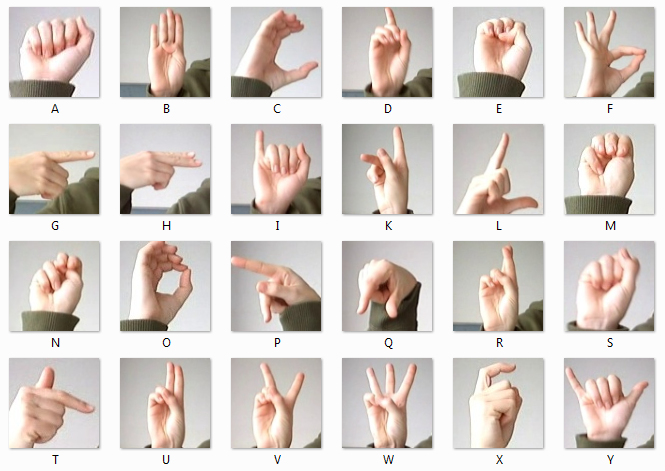


#Machine Learning - Sign Language

## Dataset

###Cargar librerías

In [ ]:
# Core
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns;
from sklearn.model_selection import train_test_split

### Cargar Datos
Cargamos los dataset almacenados en nuestra carpeta, los datos de entrenamiento y de validacion.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

test_data = '/content/drive/MyDrive/Colab Notebooks/aprendizaje automatico/proyecto/sign_mnist_test/sign_mnist_test.csv'
train_data = '/content/drive/MyDrive/Colab Notebooks/aprendizaje automatico/proyecto/sign_mnist_train/sign_mnist_train.csv'


###Conversión a Dataframe
convertimos nuestros datos a dataframe, para realizar un procesamiento y visualizacion de los datos adecuadamente.

In [ ]:
test_dataset  = pd.read_csv(test_data)
train_dataset = pd.read_csv(train_data)

In [ ]:
train_dataset.head(10)

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   
5     16     161     168     172     173     178     184     189     193   
6      8     134     134     135     135     136     137     137     138   
7     22     114      42      74      99     104     109     117     127   
8      3     169     174     176     180     183     185     187     188   
9      3     189     189     189     190     190     191     190     190   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   
5     196  ...        76        74        68        62        53        55   
6     138  ...       109       102        91        65       138       189   
7     142  ...       214       218       220       223       223       225   
8     190  ...       119       118       123       120       118       114   
9     190  ...        13        53       200       204       201       201   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       203       202  
1       175       103       135       149  
2       198       195       194       195  
3       225       222       229       163  
4       157       163       164       179  
5        48       238       255       255  
6       179       181       181       179  
7       227       227       228       228  
8        94        74        61        57  
9       193       175       178       156  

[10 rows x 785 columns]

In [ ]:
test_dataset.head(10)

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      6     149     149     150     150     150     151     151     150   
1      5     126     128     131     132     133     134     135     135   
2     10      85      88      92      96     105     123     135     143   
3      0     203     205     207     206     207     209     210     209   
4      3     188     191     193     195     199     201     202     203   
5     21      72      79      87     101     115     124     131     135   
6     10      93     100     112     118     123     127     131     133   
7     14     177     177     177     177     177     178     179     179   
8      3     191     194     196     198     201     203     204     205   
9      7     171     172     172     173     173     173     173     173   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     151  ...       138       148       127        89        82        96   
1     136  ...        47       104       194       183       186       184   
2     147  ...        68       166       242       227       230       227   
3     210  ...       154       248       247       248       253       236   
4     203  ...        26        40        64        48        29        46   
5     139  ...       187       189       192       193       194       194   
6     136  ...       173       175       177       178       180       180   
7     178  ...       232       223       224       224       223       221   
8     205  ...        43        57        78        64        47        62   
9     172  ...       199       199       198       196       195       194   

   pixel781  pixel782  pixel783  pixel784  
0       106       112       120       107  
1       184       184       182       180  
2       226       225       224       222  
3       230       240       253       255  
4        49        46        46        53  
5       194       195       195       194  
6       181       181       181       183  
7       221       221       220       219  
8        65        62        62        68  
9       183        85        65       124  

[10 rows x 785 columns]

In [ ]:
print("Dimensiones.():\n", train_dataset.shape)

Dimensiones.():
 (27455, 785)


In [ ]:
print("cancer.keys():\n", train_dataset.keys())

cancer.keys():
 Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


In [ ]:
print(train_dataset.columns.values.tolist())


['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91'

Verificacion de datos nulos

In [ ]:
train_dataset.isna().sum().sort_values(ascending=True)

label       0
pixel517    0
pixel518    0
pixel519    0
pixel520    0
           ..
pixel264    0
pixel265    0
pixel266    0
pixel268    0
pixel784    0
Length: 785, dtype: int64

In [ ]:
test_dataset.isna().sum().sort_values(ascending=True)

label       0
pixel517    0
pixel518    0
pixel519    0
pixel520    0
           ..
pixel264    0
pixel265    0
pixel266    0
pixel268    0
pixel784    0
Length: 785, dtype: int64

In [ ]:
#Van a existir muchas filas duplicadas debido a que se trata de pixeles en una imágen
# No se si sea correcto solo eliminarlas,  depronto dejarlas intactas y puede ayudar al pca
#a tener mayor información en sus componentes principales
#train = train.drop_duplicates()
#test  = test.drop_duplicates()

###Separando variable objetivo
separamos nuestro la variable objetivo, que en nuestro caso es el label. en cada uno de nuestros datasets

In [ ]:
train_label = train_dataset['label']
train = train_dataset.drop(['label'],axis=1)

In [ ]:
test_label = test_dataset['label']
test = test_dataset.drop(['label'],axis=1)

In [ ]:
print(train.shape)
print(test.shape)
print(train_label.shape)
print(test_label.shape)

(27455, 784)
(7172, 784)
(27455,)
(7172,)


###Visualización de datos
En esta parte, analizaremos y versualizaremos cada parte de los datos para estar cerca de nuestro objetivo y luego pasaremos a los modelos implementados. Sentiremos el mejor factor que afecta nuestro objetivo.

In [ ]:
print("Dimensiones.():\n", train_dataset.shape)

Dimensiones.():
 (27455, 785)


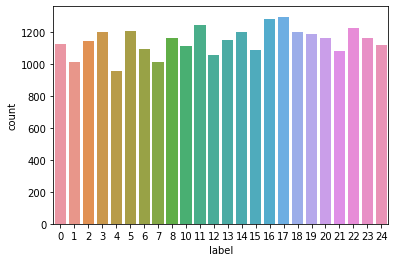

In [ ]:
sns.countplot(x= train_label)
plt.show()

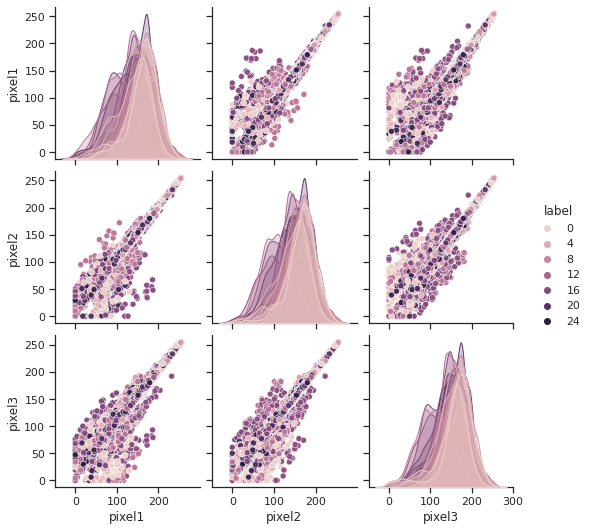

In [ ]:
import seaborn as sns
columns = ['label',	'pixel1',	'pixel2',	'pixel3']
X = train_dataset[columns]
sns.set_theme(style="ticks")
sns.pairplot(X, hue="label")

texto en negritaEscuché que necesitamos normalizar los datos entre 0,1 en lugar de 0,255, lo cual es mucho mejor para asegurarnos de que todos los datos tengan la misma importancia.

In [ ]:
import math
from sklearn.preprocessing import Normalizer

print(type(train))
#convirtiendo nuestro datos en un arreglo
train = np.array(train)
test  = np.array(test)
print(type(train))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [ ]:
#redimensionando nuestros datos a escala de 28*28 en escala de grises
# filas de 784 si sacamos su raiz cuadra podemos obtener 28 x 28 = 784
#Son imágnes cuadradas math.sqrt(train.shape[1])

train_plot = train.reshape(train.shape[0],int(math.sqrt(train.shape[1])),int(math.sqrt(train.shape[1])),1)
test_plot  = test.reshape(test.shape[0],int(math.sqrt(train.shape[1])),int(math.sqrt(train.shape[1])),1)

print(train_plot.shape)
print(test_plot.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [ ]:
visualization_data = np.array(train_dataset, dtype = 'float32')

In [ ]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

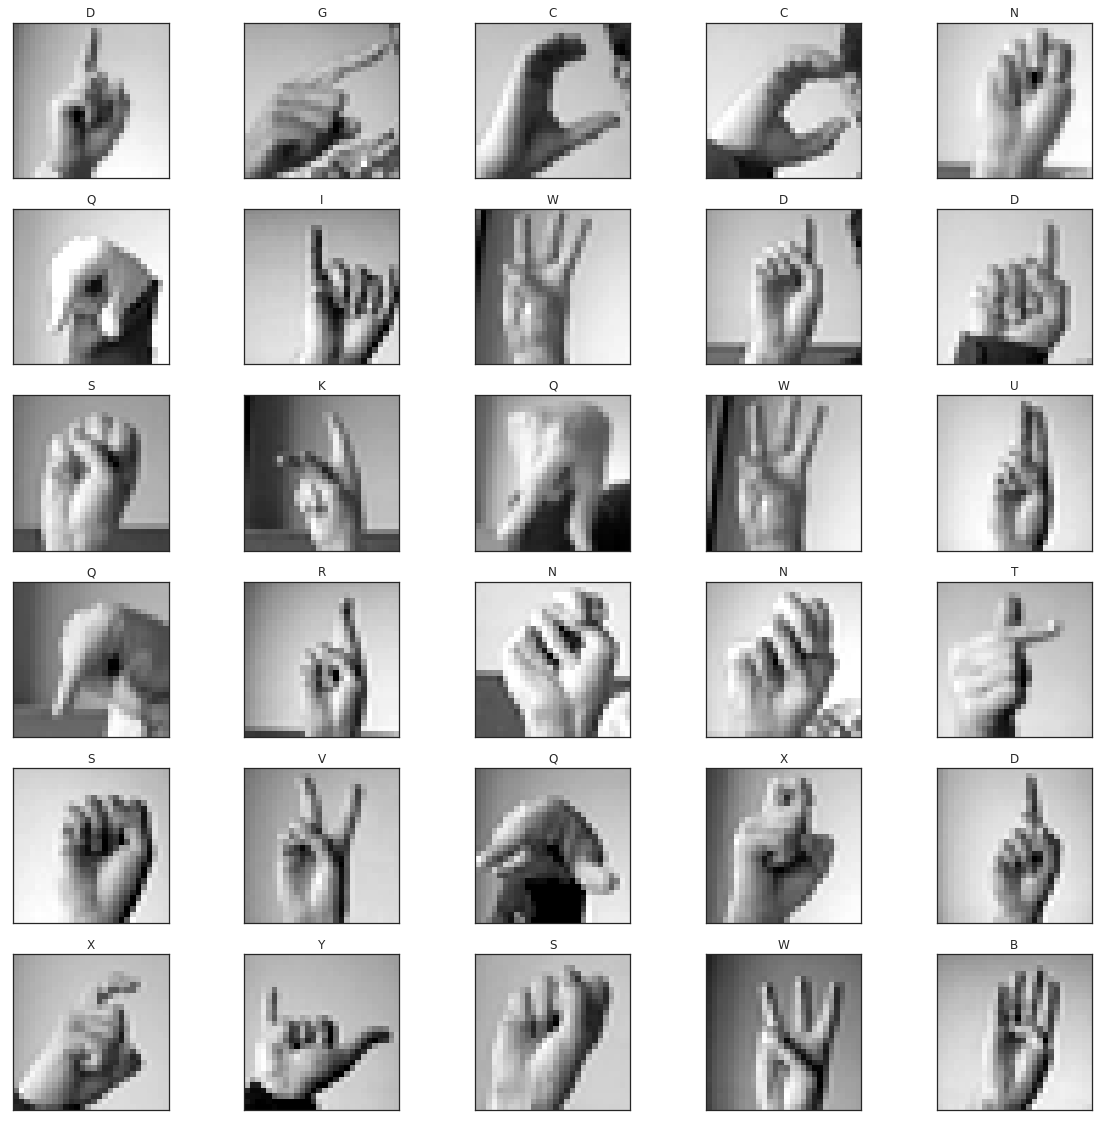

In [ ]:
def plot_images(train_plot, train_label):
  plt.figure(figsize=(20,20))
  for i in range(0,30):
    plt.subplot(6,5,i+1)
    plt.imshow(train_plot[i].reshape(int(math.sqrt(train.shape[1])),int(math.sqrt(train.shape[1]))),cmap='gray')    
    plt.title(class_names[int(visualization_data[i,0])])
    plt.xticks(())
    plt.yticks(())

plot_images(train_plot, train_label)

##Preprocessing


###Dimensionality Reduction

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, train_label, stratify=train_label, random_state=0)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
from sklearn.decomposition import PCA
#We enable the whitening option of PCA: Use standardScaler after the 
#transformation. Fit the PCA object and extract the first 100 principal components
pca = PCA(n_components=3, whiten=True, random_state=0).fit(X_train)
X = pca.transform(X_train)


print("X_pca.shape: {}".format(X.shape))
print("X_type: {}".format(X))

X_pca.shape: (20591, 3)
X_type: [[ 1.15149779 -0.75081211  0.4826188 ]
 [-0.35584164  0.00485614  0.35646554]
 [ 0.65532265 -0.2864023  -0.14609057]
 ...
 [ 1.23792183 -0.63468261  1.50452445]
 [-0.6207434  -0.95066084  0.27963165]
 [-0.56688679  0.42501954 -0.66582035]]


In [ ]:
pca.explained_variance_ratio_

array([0.31080742, 0.09612274, 0.07691405])

In [ ]:
pca.explained_variance_ratio_.sum()

0.48384420397242156

### K-Means

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# Generate synthetic data
# Build clustering model
kmeans = KMeans(n_clusters=25)

kmeans.fit(X)
print(X.shape)

(20591, 3)


In [ ]:
print("Cluster memberships: {}".format(kmeans.labels_))
print("kmeans.labels_.shape:", kmeans.labels_.shape)
print("X.shape", X.shape)
print("kmeans.cluster_centers_: ", kmeans.cluster_centers_)

Cluster memberships: [11 23  1 ...  9 23 24]
kmeans.labels_.shape: (20591,)
X.shape (20591, 3)
kmeans.cluster_centers_:  [[-0.04500236  0.32137843 -1.0630946 ]
 [ 0.61466304 -0.14662199 -0.43357529]
 [ 1.10504302  0.21889282  0.60442727]
 [-0.55461063  2.63083605  0.61565183]
 [-1.57872275 -0.42433316 -0.03856595]
 [ 0.63225842 -0.32938172 -2.124598  ]
 [ 2.54040453  0.33792005 -0.2464135 ]
 [-1.0100815  -1.14985484  0.8733426 ]
 [-1.18985499  0.60966083  0.51489383]
 [ 1.0266626  -0.85247056  1.47612646]
 [-0.39496927  2.01950959 -0.90131539]
 [ 1.02404847 -1.06824407 -0.02174665]
 [ 0.64587231  2.16179403  2.42729768]
 [ 1.26731382  0.81662828 -0.92210976]
 [-1.18058703 -0.14210042 -1.24507525]
 [ 0.03745559  0.6419676   0.33476556]
 [ 0.07706701 -1.52276251  1.25813468]
 [-0.21313235 -0.80967185 -0.44418345]
 [-1.71056292  0.66883104 -0.61511367]
 [ 0.21190349  0.99163883  1.60943342]
 [ 1.02755339  2.47286721 -0.06564029]
 [ 0.09209418 -0.49079708  0.72630472]
 [ 1.96278793 -0.5980

In [ ]:
nassig=kmeans.predict(X)
print(nassig)
print(nassig.shape)
print(X.shape)

[11 23  1 ...  9 23 24]
(20591,)
(20591, 3)


In [ ]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=af3090a4b048843b1849acbd972cc2b14a3d3bb8f7dfaa5729138871b9857306
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
(20591, 3)


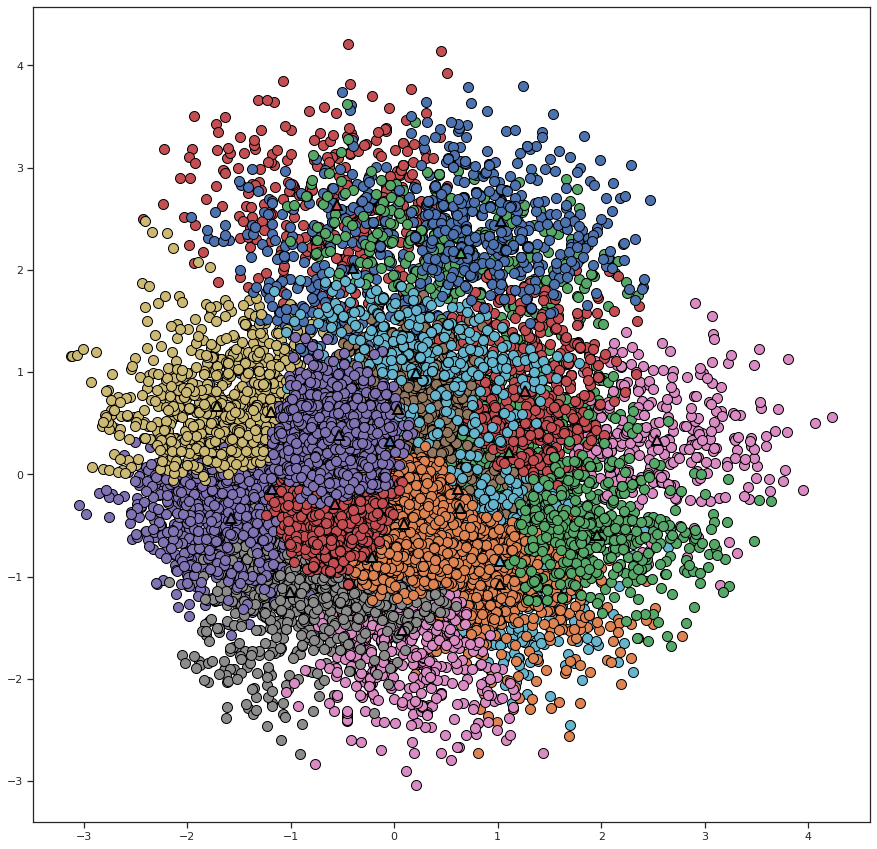

In [ ]:
import mglearn
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

vector = np.arange(0,25)
print(vector)
fig, axes = plt.subplots(1, 1, figsize=(15, 15))
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], vector, markers='^', markeredgewidth=2)

print(X.shape)

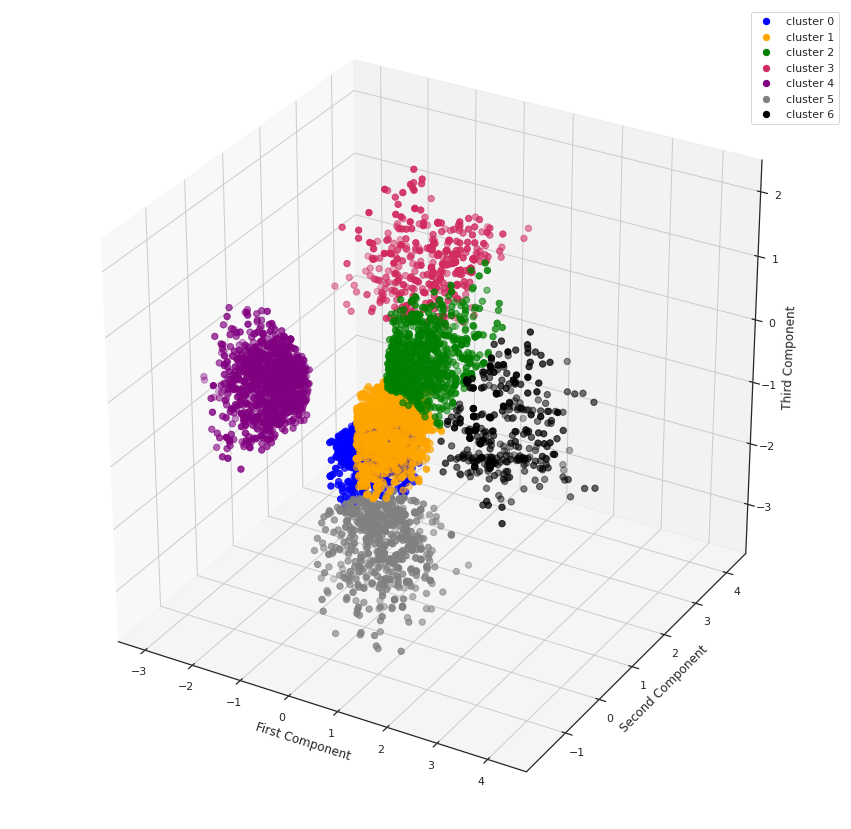

In [ ]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[nassig == 0,0],X[nassig == 0,1],X[nassig == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X[nassig == 1,0],X[nassig == 1,1],X[nassig == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(X[nassig == 2,0],X[nassig == 2,1],X[nassig == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(X[nassig == 3,0],X[nassig == 3,1],X[nassig == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(X[nassig == 4,0],X[nassig == 4,1],X[nassig == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.scatter(X[nassig == 5,0],X[nassig == 5,1],X[nassig == 5,2], s = 40 , color = 'gray', label = "cluster 5")
ax.scatter(X[nassig == 6,0],X[nassig == 6,1],X[nassig == 6,2], s = 40 , color = 'black', label = "cluster 6")


ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
ax.set_zlabel('Third Component')
ax.legend()
plt.show()

In [ ]:
Scene = dict(xaxis = dict(title  = 'Dimensión 1 -->'),yaxis = dict(title  = 'Dimensión 2 --->'),zaxis = dict(title  = 'Dimensión 3 -->'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = nassig
trace = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

Cluster vs Images

---



In [ ]:
label = nassig
np.unique(label)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [ ]:
import matplotlib.pyplot as plt
import random

number_of_colors = 25

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
print(color)

['#86AE8B', '#DAC793', '#A37A5E', '#23BE5C', '#A2DAD9', '#EEA495', '#EC30F8', '#3A4B6A', '#6861DD', '#F20731', '#9454D0', '#56277B', '#DD74EB', '#73F5A5', '#F2840C', '#AD99B1', '#93D06A', '#AA32F9', '#30363D', '#C42607', '#67BEA6', '#EABF30', '#E6F178', '#7F6411', '#4A0D58']


In [ ]:
print( np.unique(label))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


In [ ]:
print( len(np.unique(label)))
clusterNum = np.unique(label)
print(clusterNum)

25
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



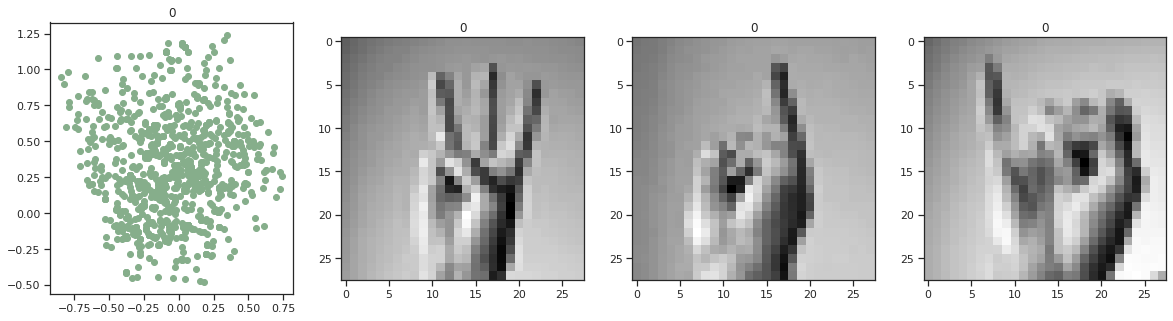

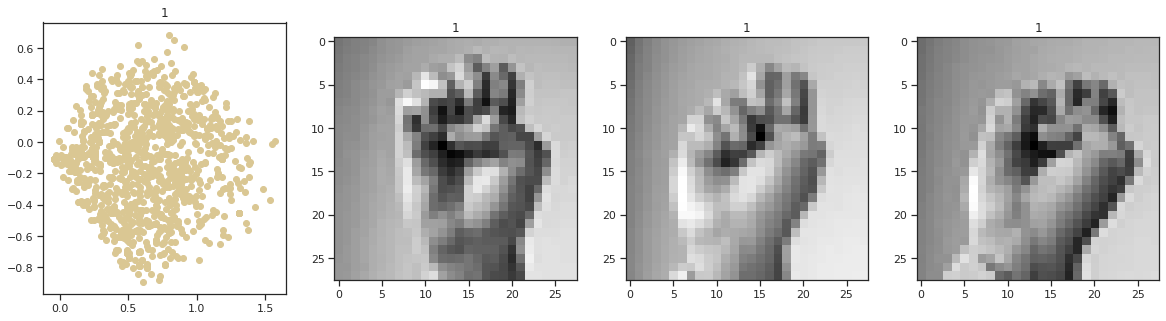

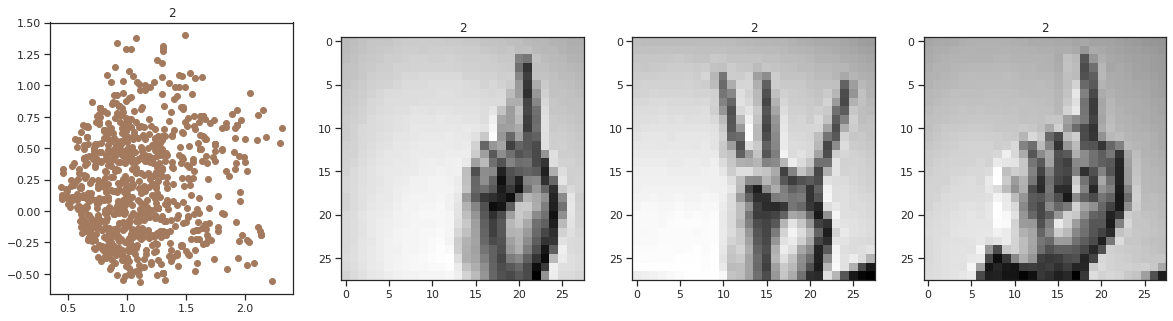

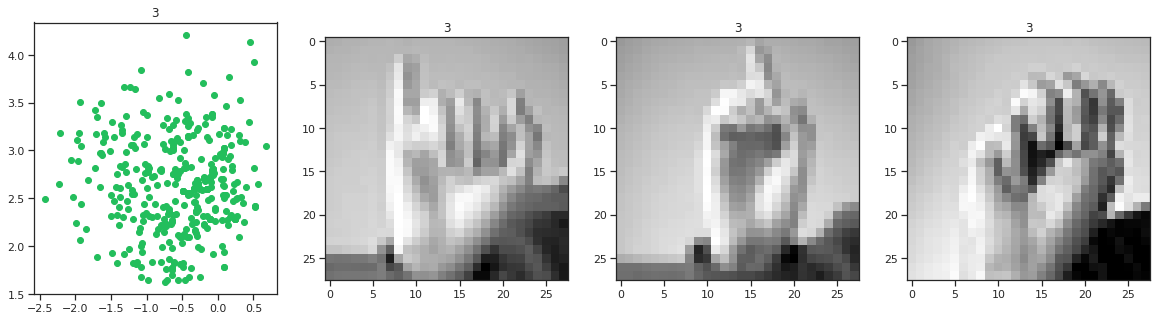

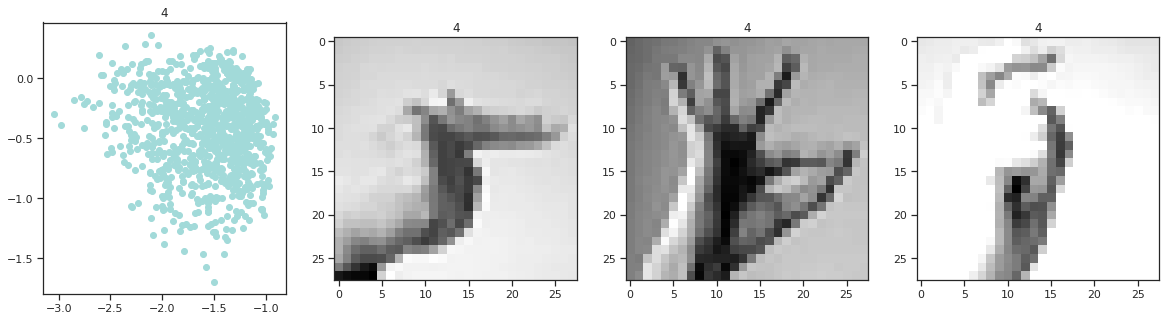

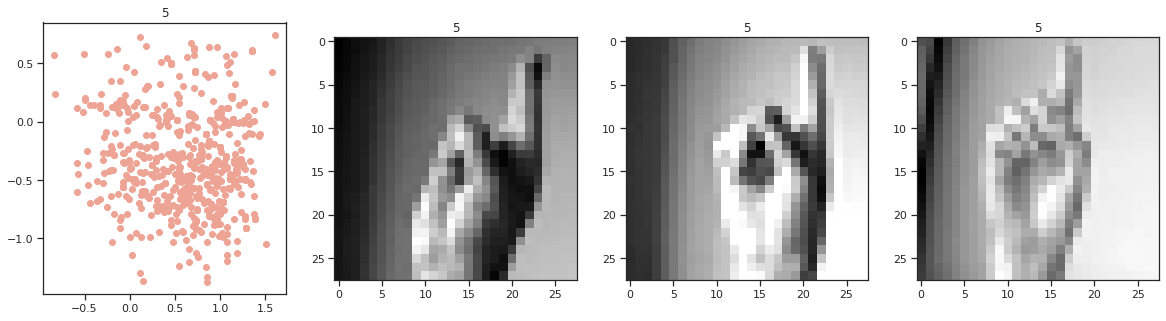

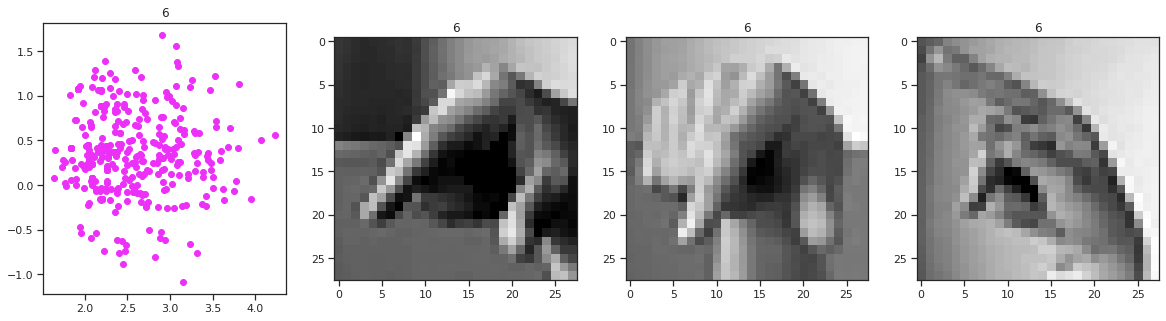

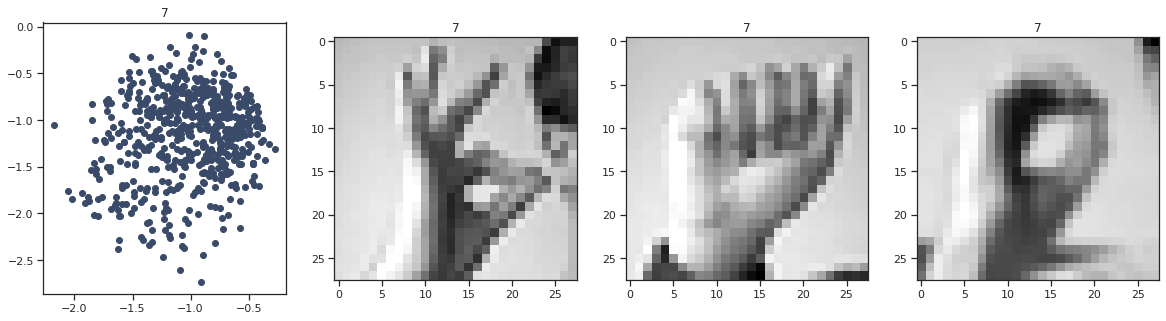

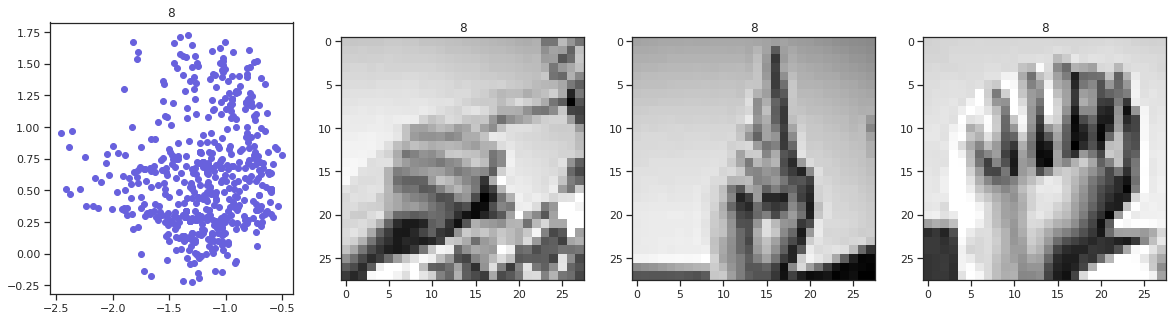

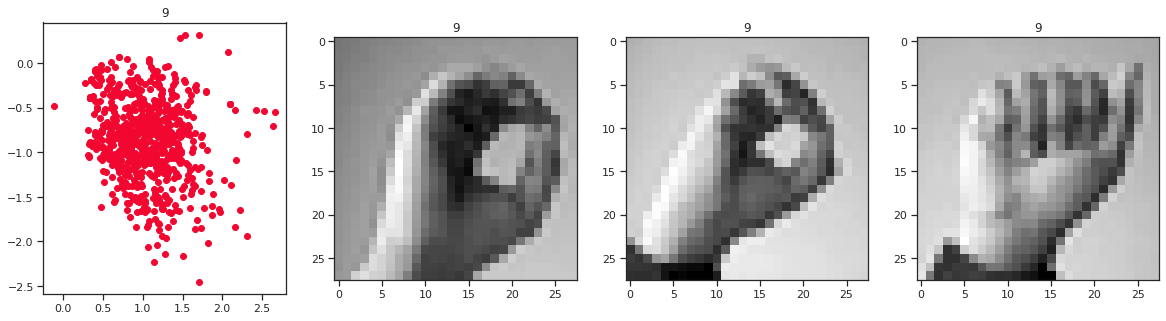

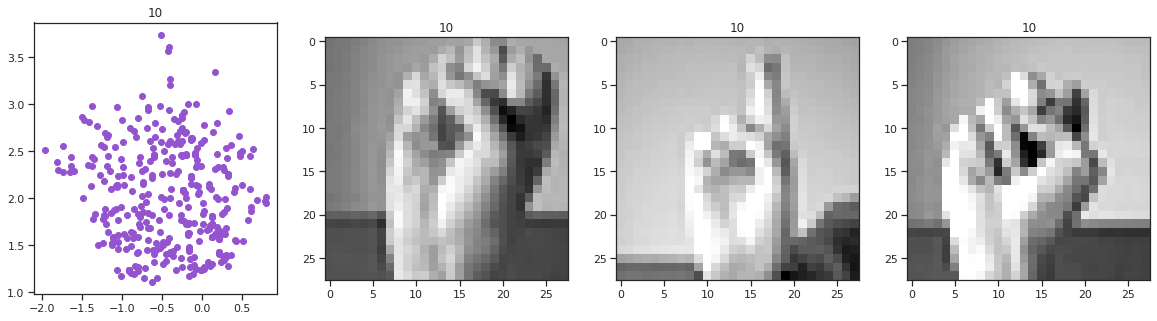

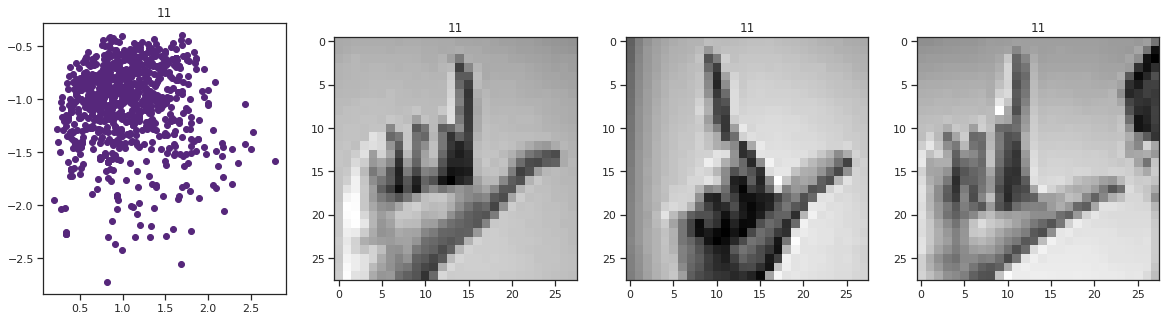

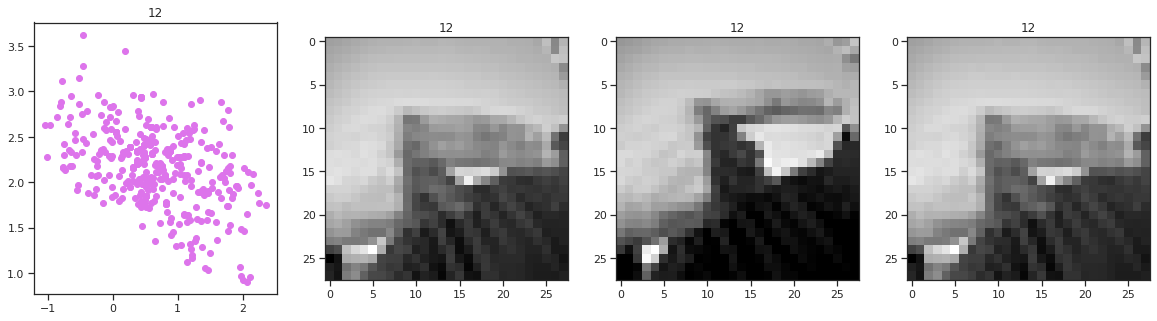

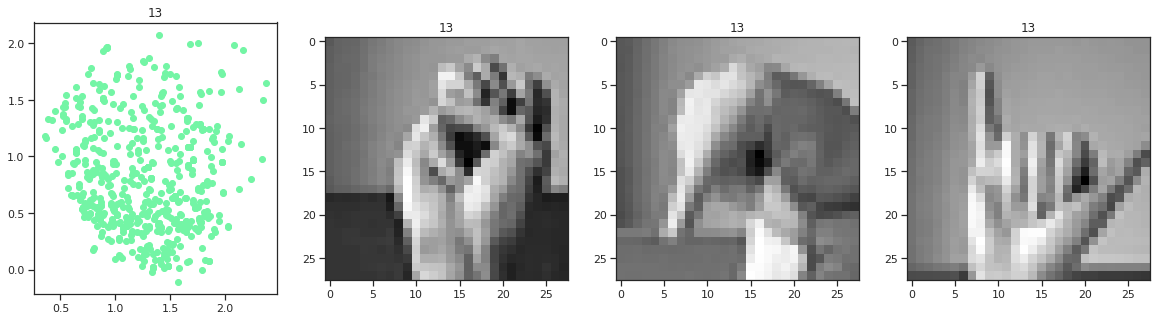

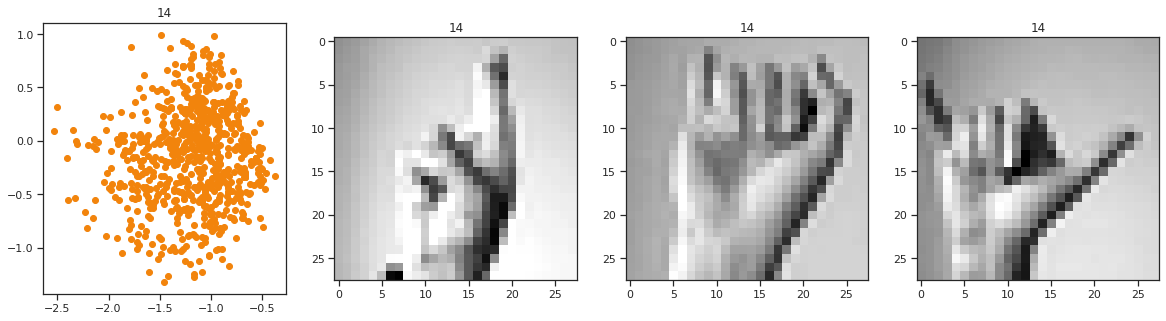

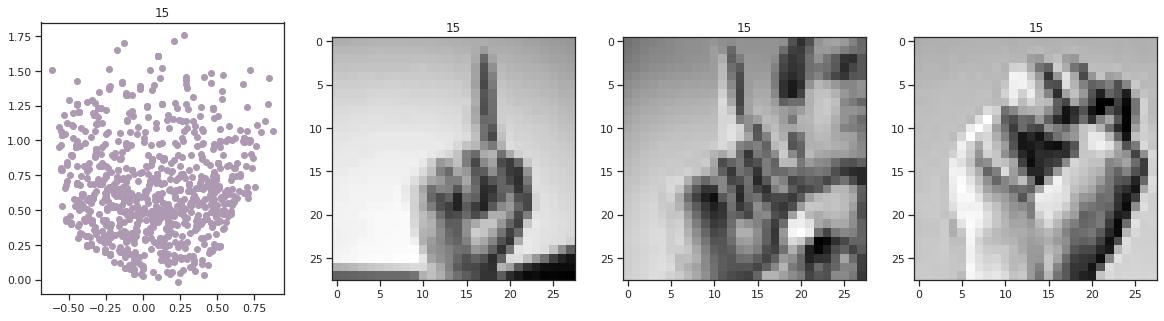

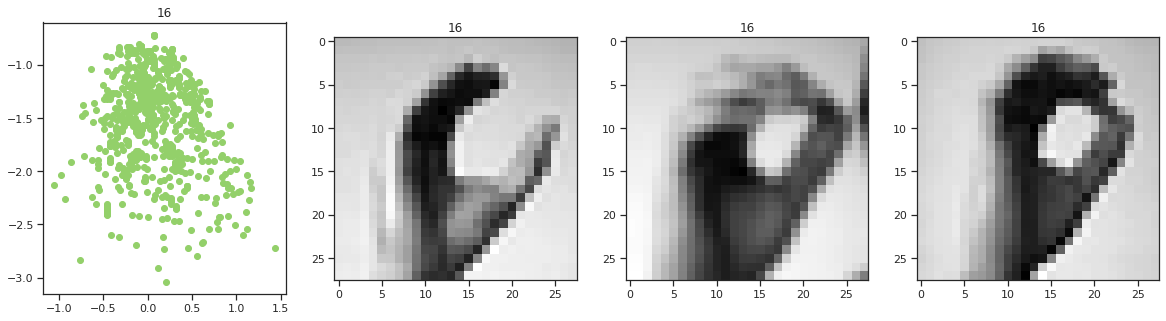

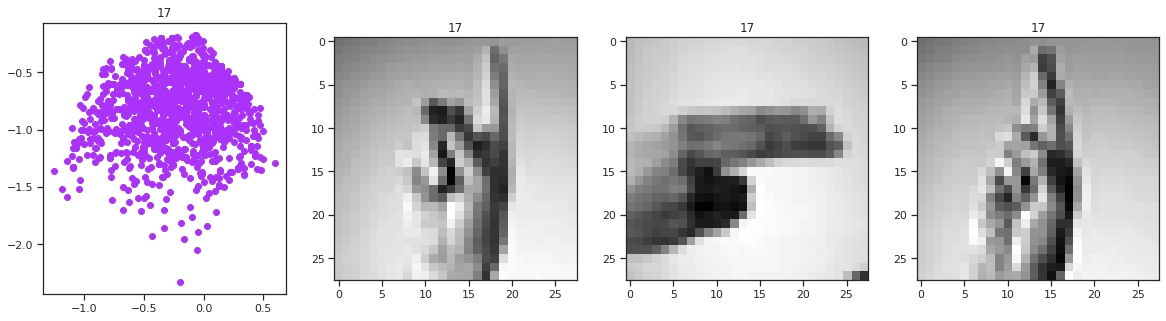

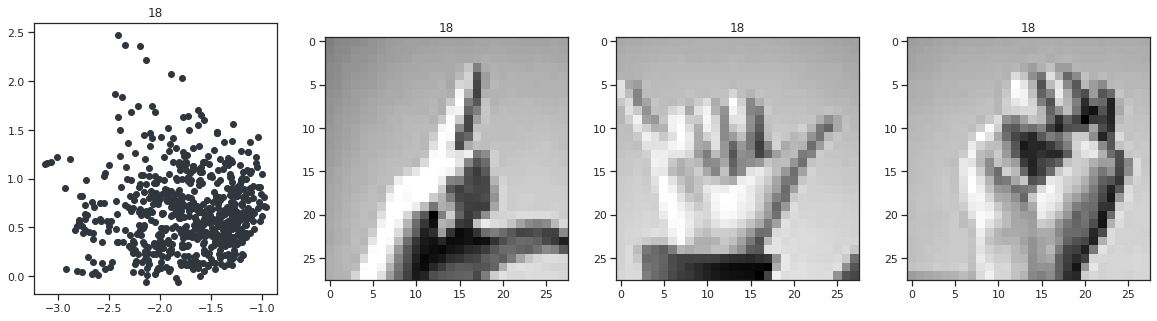

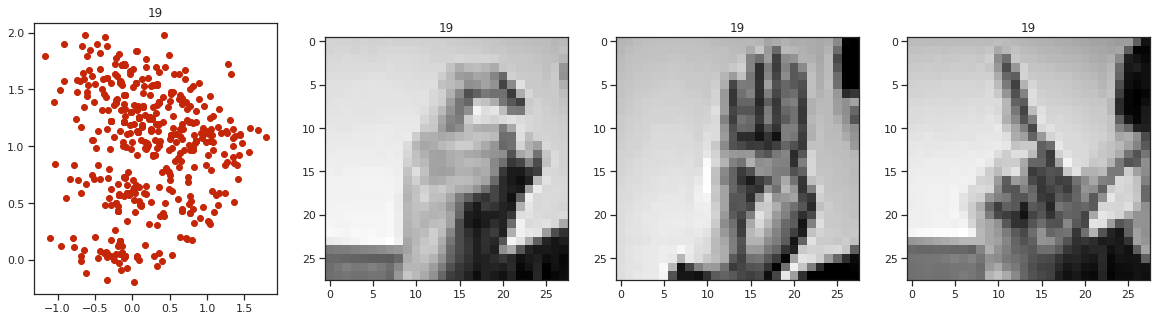

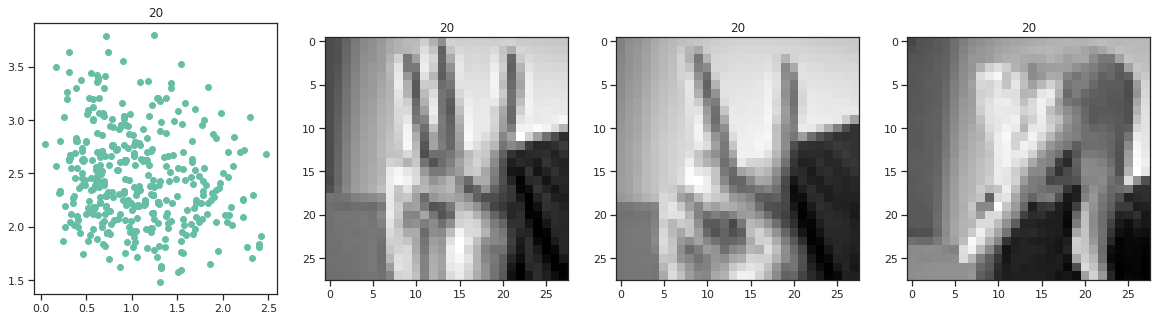

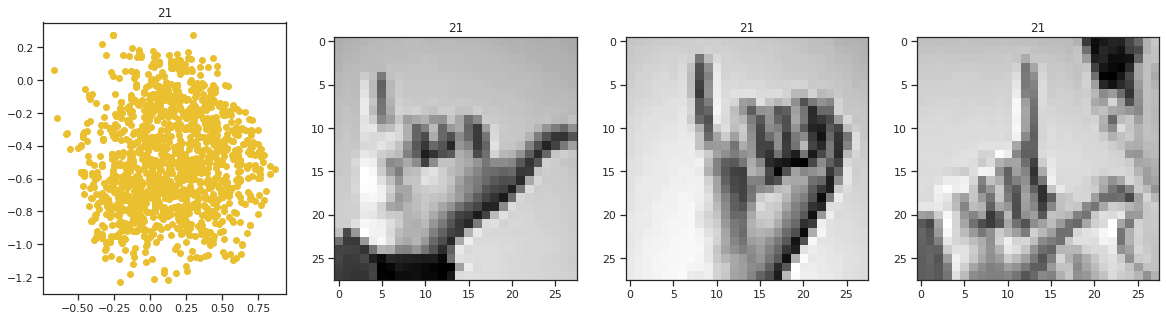

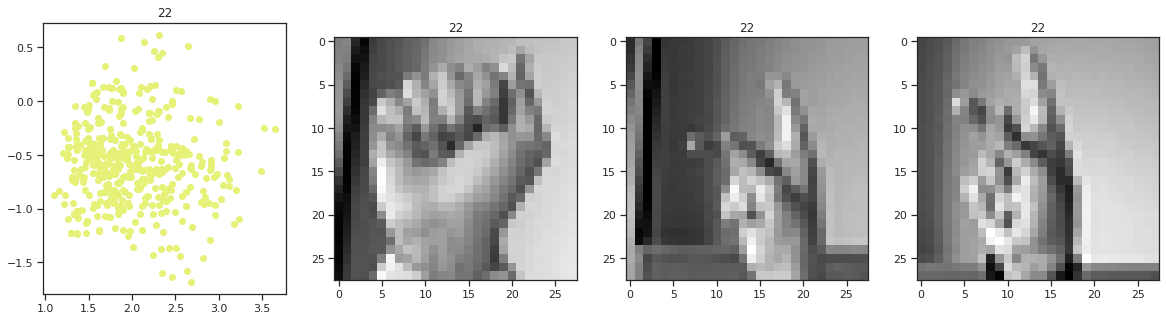

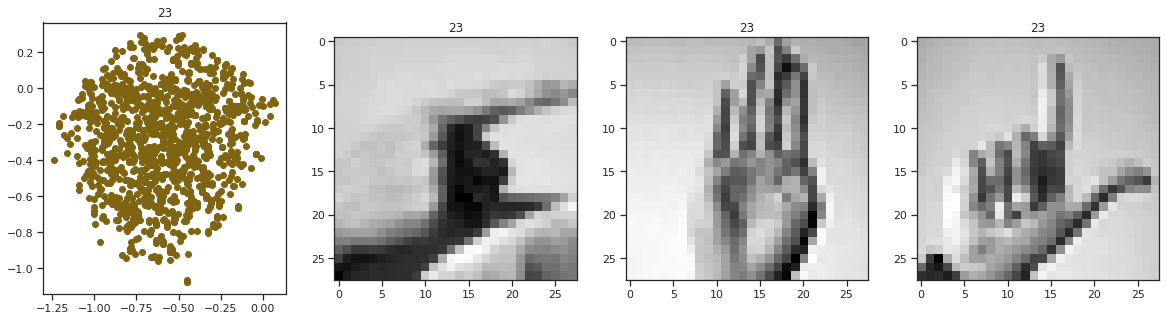

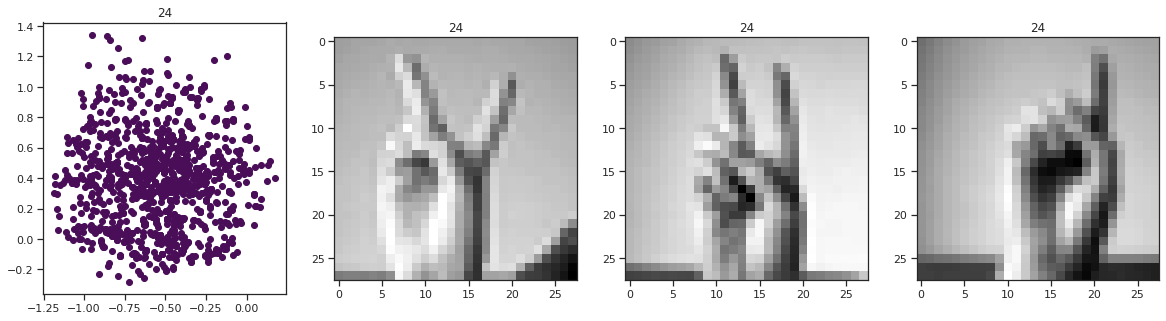

In [ ]:
def plot_images(X, train_label):
  for cluster_id in clusterNum:  
    fig = plt.figure(figsize=(20, 5))

    #Plotting individual cluster
    cluster = X[label == cluster_id]
    ax1 = fig.add_subplot(141)
    ax1.set_title(cluster_id)
    ax1.scatter(cluster[:,0] , cluster[:,1], color = color[cluster_id])

    #Ploting image from the cluster
    ax2 = fig.add_subplot(142)         
    ax2.imshow(X_train[label == cluster_id][0].reshape(28,28),cmap='gray')
    ax2.set_title(cluster_id)

    #Ploting image from the cluster
    ax3 = fig.add_subplot(143)         
    ax3.imshow(X_train[label == cluster_id][1].reshape(28,28),cmap='gray')
    ax3.set_title(cluster_id)

    #Ploting image from the cluster
    ax4 = fig.add_subplot(144)         
    ax4.imshow(X_train[label == cluster_id][2].reshape(28,28),cmap='gray')
    ax4.set_title(cluster_id)
    
    
  
plot_images(X, train_label)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



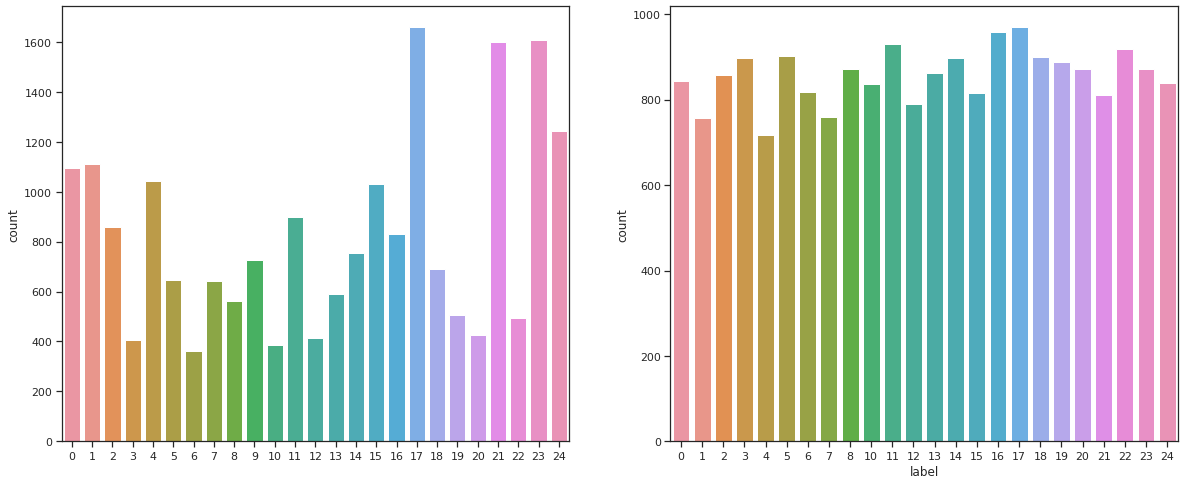

In [ ]:
fig = plt.figure(figsize = (20,8))


plt.subplot(1,2,1),sns.countplot(nassig)
plt.subplot(1,2,2),sns.countplot(y_train)

plt.show()

## Classification

### Dimensionality Reduction

In [ ]:
train = train_dataset.drop(['label'],axis=1)
test = test_dataset.drop(['label'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, train_label, stratify=train_label, random_state=42)

In [ ]:
X_train = X_train/255
X_test = X_test/255

Poner 120 en el PCA es un número mágico

In [ ]:
from sklearn.decomposition import PCA
#We enable the whitening option of PCA: Use standardScaler after the 
#transformation. Fit the PCA object and extract the first 100 principal components
pca = PCA(n_components=80, whiten=True, random_state=0).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train.shape))

X_train_pca.shape: (20591, 80)


In [ ]:
pca.explained_variance_ratio_

array([0.31125955, 0.09689583, 0.07629882, 0.05113928, 0.03257873,
       0.03104828, 0.02721622, 0.02369037, 0.02212645, 0.01709702,
       0.0166693 , 0.01463956, 0.01259022, 0.01200365, 0.00997144,
       0.00886071, 0.007858  , 0.00754413, 0.00681346, 0.00632438,
       0.00576005, 0.00536469, 0.00483373, 0.00472351, 0.00459053,
       0.00422988, 0.00396531, 0.00374209, 0.00357661, 0.00340142,
       0.00333135, 0.00328826, 0.00318275, 0.00305876, 0.00296829,
       0.00277317, 0.00276107, 0.00264313, 0.00259043, 0.00251157,
       0.00240944, 0.00236461, 0.00228327, 0.00224634, 0.00212149,
       0.00204418, 0.00201127, 0.00191862, 0.00190424, 0.00187607,
       0.00179391, 0.00174538, 0.00171643, 0.00167374, 0.00164157,
       0.00160648, 0.00153453, 0.00150741, 0.00147372, 0.00143168,
       0.00140632, 0.00135009, 0.00134396, 0.00131258, 0.00128083,
       0.00123043, 0.0012121 , 0.00119323, 0.00117318, 0.00115262,
       0.00111496, 0.00108332, 0.00106728, 0.00105025, 0.00104

In [ ]:
pca.explained_variance_ratio_.sum()

0.9260912186867363

In [ ]:
X_train.shape[1]

80

### Ensemble Methods - Training/validation

Posiblemente Al implementar más componentes principales en el caso de Random Forest. Ayude a mejorar el desempeño del modelo.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

Hard Voting

---



In [ ]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42, max_iter=1000)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

hard_voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [ ]:
hard_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('svc', SVC(random_state=42))])

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, hard_voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9981060606060606
RandomForestClassifier 1.0
SVC 1.0
VotingClassifier 1.0


In [ ]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

In [ ]:
print(len(class_names))

24


In [ ]:
print(clf.classes_)

[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


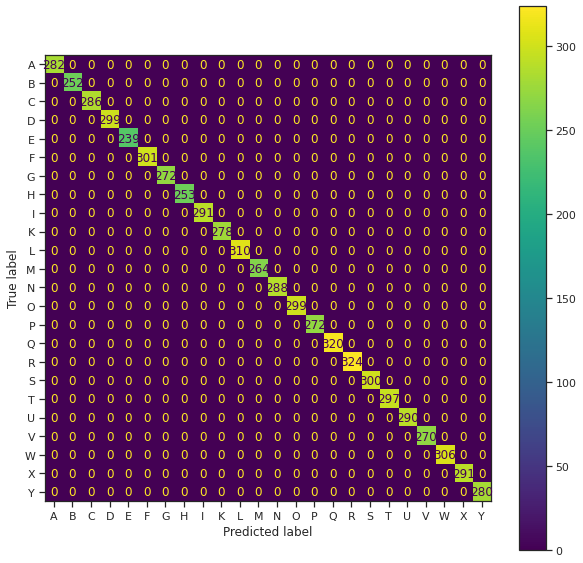

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  
                              display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

Soft Voting

---



In [ ]:
# Soft voting:
log_clf = LogisticRegression(solver="lbfgs", random_state=42, max_iter=1000)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42, max_iter=1000)

soft_voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
soft_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('svc',
                              SVC(max_iter=1000, probability=True,
                                  random_state=42))],
                 voting='soft')

In [ ]:
for clf in (log_clf, rnd_clf, svm_clf, soft_voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.9981060606060606
RandomForestClassifier 1.0
SVC 1.0
VotingClassifier 1.0


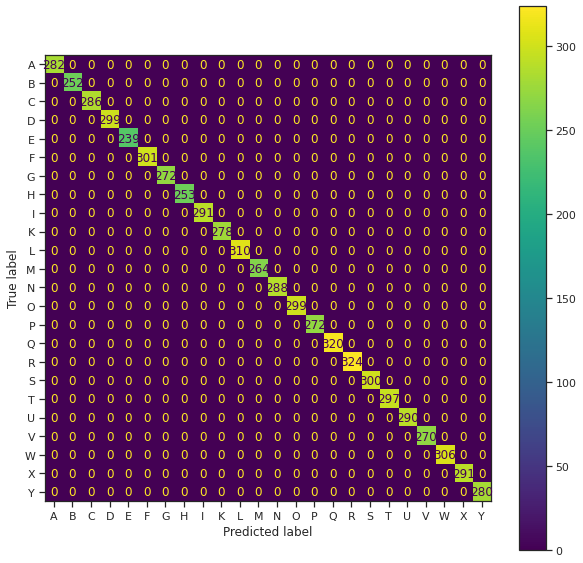

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  
                              display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

Bagging

---



In [ ]:
# Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    SVC(gamma="scale", probability=True, random_state=42), n_estimators=10,
    max_samples=5000, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

1.0


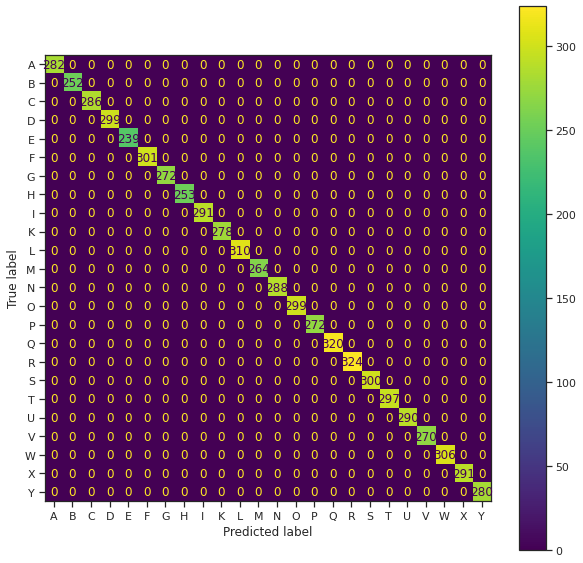

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  
                              display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

### Random Forest

In [ ]:
arr_component_label = []
for component in range(0, X_train.shape[1]):
  arr_component_label.append("Component{}".format(component))

print(arr_component_label)

['Component0', 'Component1', 'Component2', 'Component3', 'Component4', 'Component5', 'Component6', 'Component7', 'Component8', 'Component9', 'Component10', 'Component11', 'Component12', 'Component13', 'Component14', 'Component15', 'Component16', 'Component17', 'Component18', 'Component19', 'Component20', 'Component21', 'Component22', 'Component23', 'Component24', 'Component25', 'Component26', 'Component27', 'Component28', 'Component29', 'Component30', 'Component31', 'Component32', 'Component33', 'Component34', 'Component35', 'Component36', 'Component37', 'Component38', 'Component39', 'Component40', 'Component41', 'Component42', 'Component43', 'Component44', 'Component45', 'Component46', 'Component47', 'Component48', 'Component49', 'Component50', 'Component51', 'Component52', 'Component53', 'Component54', 'Component55', 'Component56', 'Component57', 'Component58', 'Component59', 'Component60', 'Component61', 'Component62', 'Component63', 'Component64', 'Component65', 'Component66', 'Com

In [ ]:

features_values = arr_component_label
print(features_values)


['Component0', 'Component1', 'Component2', 'Component3', 'Component4', 'Component5', 'Component6', 'Component7', 'Component8', 'Component9', 'Component10', 'Component11', 'Component12', 'Component13', 'Component14', 'Component15', 'Component16', 'Component17', 'Component18', 'Component19', 'Component20', 'Component21', 'Component22', 'Component23', 'Component24', 'Component25', 'Component26', 'Component27', 'Component28', 'Component29', 'Component30', 'Component31', 'Component32', 'Component33', 'Component34', 'Component35', 'Component36', 'Component37', 'Component38', 'Component39', 'Component40', 'Component41', 'Component42', 'Component43', 'Component44', 'Component45', 'Component46', 'Component47', 'Component48', 'Component49', 'Component50', 'Component51', 'Component52', 'Component53', 'Component54', 'Component55', 'Component56', 'Component57', 'Component58', 'Component59', 'Component60', 'Component61', 'Component62', 'Component63', 'Component64', 'Component65', 'Component66', 'Com

In [ ]:
forest = RandomForestClassifier(n_estimators=20, max_features=20, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(max_features=20, n_estimators=20, random_state=0)

In [ ]:
display(forest.estimators_[0])
from sklearn.tree import export_graphviz
export_graphviz(forest.estimators_[2], out_file="tree_dot",  feature_names=features_values, impurity=False, filled=True)

DecisionTreeClassifier(max_features=20, random_state=209652396)

Visualización Tree - Forest

In [ ]:
import graphviz
with open("/content/tree_dot") as f:
    dot_graph = f.read()
#display(graphviz.Source(dot_graph))

In [ ]:
print(X_train.shape)
print(forest.estimators_)

(20591, 80)
[DecisionTreeClassifier(max_features=20, random_state=209652396), DecisionTreeClassifier(max_features=20, random_state=398764591), DecisionTreeClassifier(max_features=20, random_state=924231285), DecisionTreeClassifier(max_features=20, random_state=1478610112), DecisionTreeClassifier(max_features=20, random_state=441365315), DecisionTreeClassifier(max_features=20, random_state=1537364731), DecisionTreeClassifier(max_features=20, random_state=192771779), DecisionTreeClassifier(max_features=20, random_state=1491434855), DecisionTreeClassifier(max_features=20, random_state=1819583497), DecisionTreeClassifier(max_features=20, random_state=530702035), DecisionTreeClassifier(max_features=20, random_state=626610453), DecisionTreeClassifier(max_features=20, random_state=1650906866), DecisionTreeClassifier(max_features=20, random_state=1879422756), DecisionTreeClassifier(max_features=20, random_state=1277901399), DecisionTreeClassifier(max_features=20, random_state=1682652230), Deci

In [ ]:
forest = RandomForestClassifier(n_estimators=20, max_features=20, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set", forest.score(X_train, y_train))
print("Accuracy on test set", forest.score(X_test, y_test))

Accuracy on training set 1.0
Accuracy on test set 0.9998543123543123


Confusion Matrix - Random Forest

In [ ]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

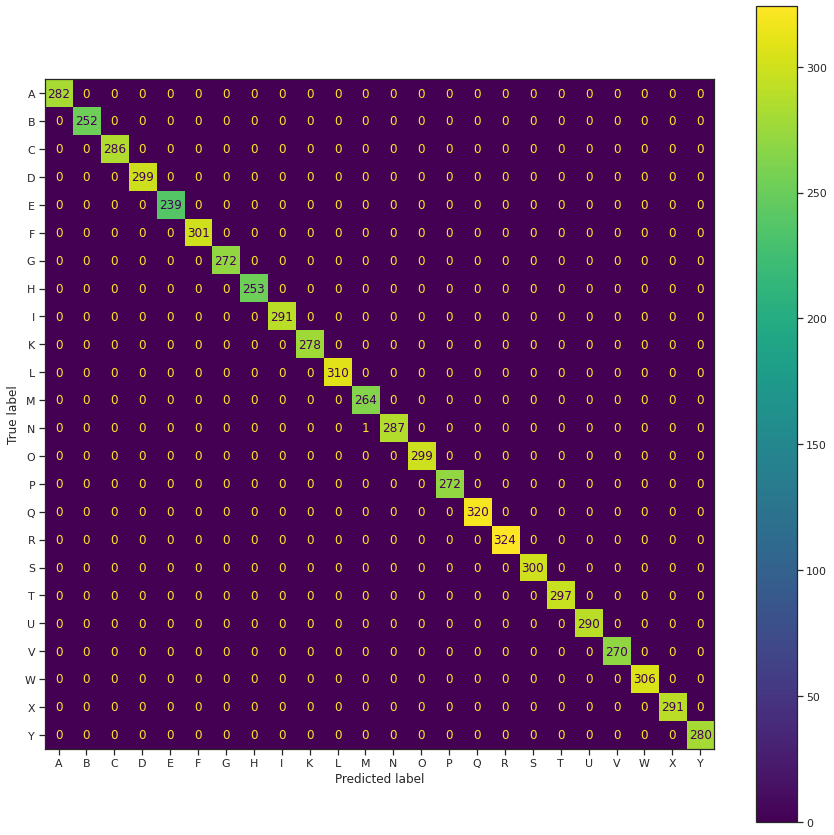

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(15,15))
ConfusionMatrixDisplay.from_estimator(
    forest, X_test, y_test, display_labels=class_names,ax=ax, xticks_rotation="horizontal"
)
plt.show()

In [ ]:
def plot_feature_importances_sign(model):
    n_features = len(features_values)    
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features_values)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

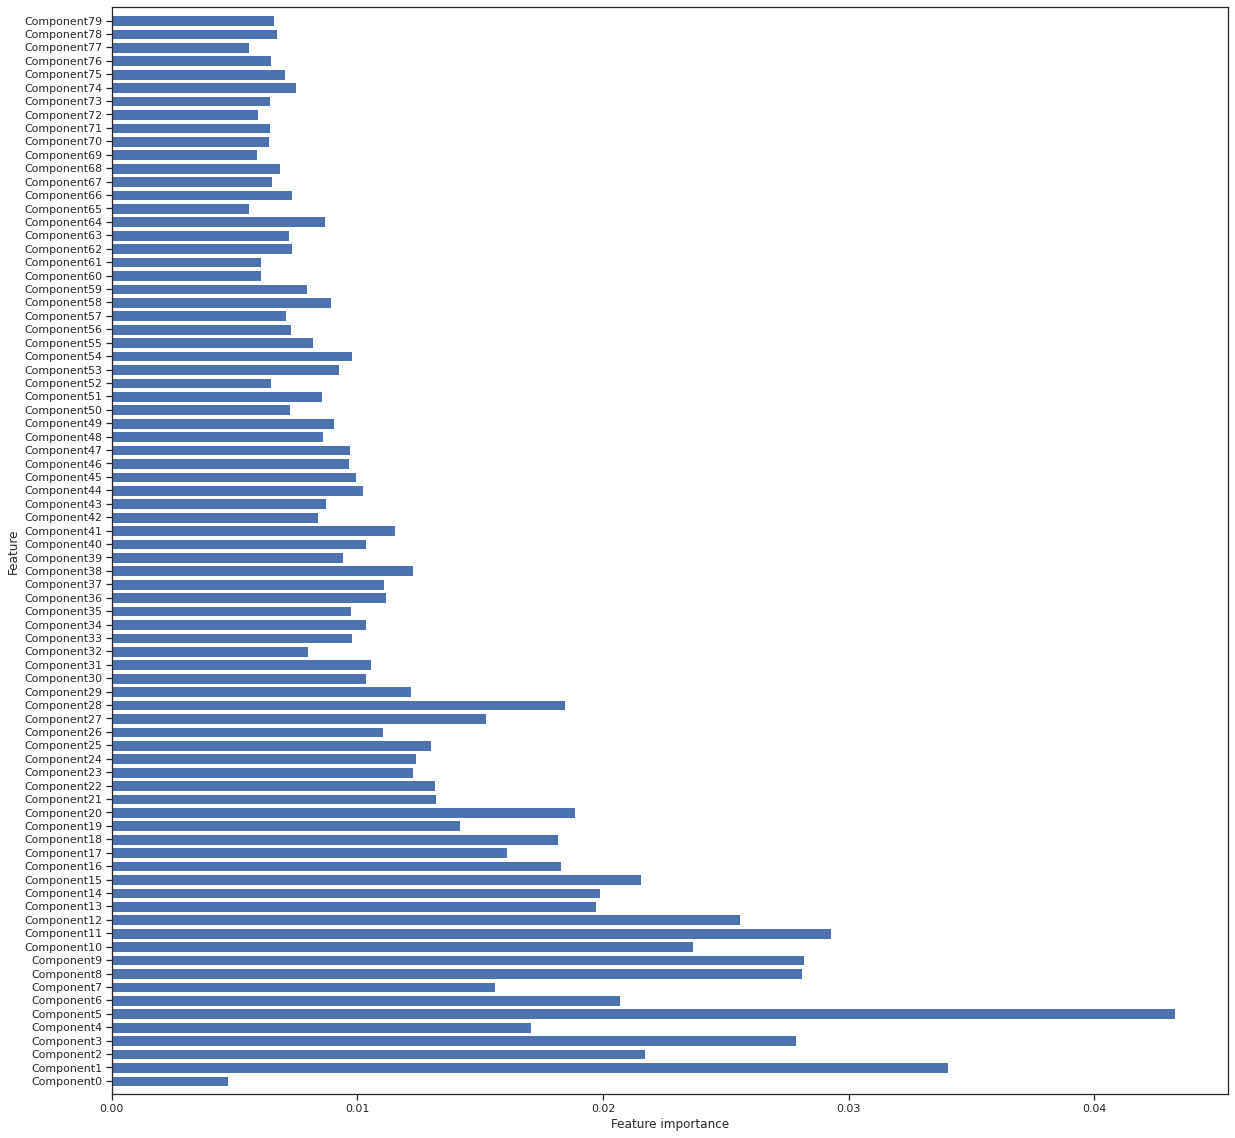

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))

plot_feature_importances_sign(forest)

### Pipeline

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, train_label, stratify=train_label, random_state=42)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


In [ ]:
forest = RandomForestClassifier(n_estimators=20)

In [ ]:
pipe = Pipeline(steps=[('pca', pca), ('forest', forest)])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=80, random_state=0, whiten=True)),
                ('forest', RandomForestClassifier(n_estimators=20))])

Acuracy test data

In [ ]:
test_predictions = pipe.predict(X_test)
precision = accuracy_score(test_predictions, y_test)
print("Accuracy with RandomForest: {0:.6f}%".format(precision))

Accuracy with RandomForest: 1.000000%


PipeLine + GridSearch

In [ ]:
#pca__n_components:[60, 80, 100]
from sklearn.model_selection import GridSearchCV

param_dict = {"pca__n_components":[10, 15, 18],
              "forest__n_estimators":[20, 30, 40, 50]}

estimator = GridSearchCV(pipe,
                         param_dict,
                         verbose=2)

In [ ]:
estimator.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ......forest__n_estimators=20, pca__n_components=10; total time=   3.3s
[CV] END ......forest__n_estimators=20, pca__n_components=10; total time=   3.2s
[CV] END ......forest__n_estimators=20, pca__n_components=10; total time=   3.1s
[CV] END ......forest__n_estimators=20, pca__n_components=10; total time=   3.2s
[CV] END ......forest__n_estimators=20, pca__n_components=10; total time=   3.2s
[CV] END ......forest__n_estimators=20, pca__n_components=15; total time=   3.3s
[CV] END ......forest__n_estimators=20, pca__n_components=15; total time=   3.3s
[CV] END ......forest__n_estimators=20, pca__n_components=15; total time=   3.2s
[CV] END ......forest__n_estimators=20, pca__n_components=15; total time=   3.3s
[CV] END ......forest__n_estimators=20, pca__n_components=15; total time=   3.2s
[CV] END ......forest__n_estimators=20, pca__n_components=18; total time=   3.7s
[CV] END ......forest__n_estimators=20, pca__n_c

GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=80, random_state=0,
                                            whiten=True)),
                                       ('forest',
                                        RandomForestClassifier(n_estimators=20))]),
             param_grid={'forest__n_estimators': [20, 30, 40, 50],
                         'pca__n_components': [10, 15, 18]},
             verbose=2)

In [ ]:
print("The best parameters: {0}".format(estimator.best_params_))

The best parameters: {'forest__n_estimators': 50, 'pca__n_components': 18}


In [ ]:
pipe.set_params(**estimator.best_params_)

Pipeline(steps=[('pca', PCA(n_components=18, random_state=0, whiten=True)),
                ('forest', RandomForestClassifier(n_estimators=50))])

Calcular la precisión con la nueva canalización

In [ ]:
test_predictions = pipe.predict(X_train)
precision = accuracy_score(test_predictions, y_train)
print("Accuracy with RandomForest: {0:.6f}%".format(precision))

Accuracy with RandomForest: 1.000000%


In [ ]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

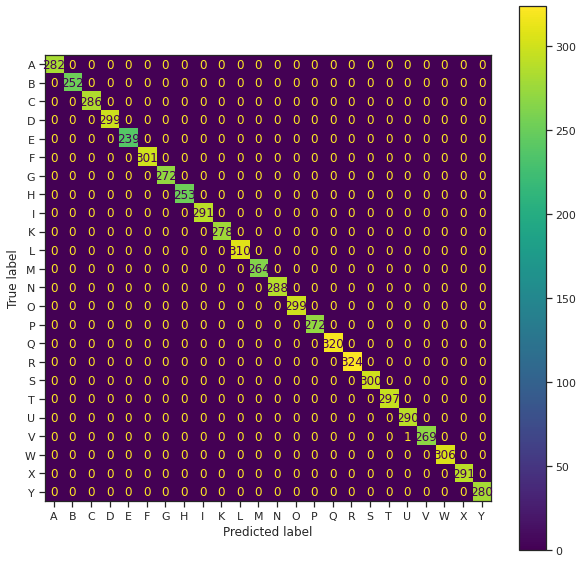

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(10,10))
ConfusionMatrixDisplay.from_estimator(
    estimator, X_test, y_test, display_labels=class_names,ax=ax, xticks_rotation="horizontal"
)
plt.show()

### Ensemble Methods - Predicting External Unknown Data

Posiblemente Al implementar más componentes principales en el caso de Random Forest. Ayude a mejorar el desempeño del modelo.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

Definimos funcion que permitirá plotear imágen - Title Real y Title predicho por los diferentes modelos

In [ ]:

def plot_images_prediction(X_test,y_test,y_pred):
  plt.figure(figsize=(20,20))
  for i in range(0,30):
    plt.subplot(6,5,i+1)
    
    plt.imshow(X_test[i].reshape(28, 28), cmap='Greys')
    plt.title("Real: {} - Prediction: {}".format(class_names[int(y_test[i])],class_names[int(y_pred[i])]))
    plt.xticks(())
    plt.yticks(())



In [ ]:
dataset_source = np.array(test, dtype = 'float32')

In [ ]:
test.head()

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     149     149     150     150     150     151     151     150     151   
1     126     128     131     132     133     134     135     135     136   
2      85      88      92      96     105     123     135     143     147   
3     203     205     207     206     207     209     210     209     210   
4     188     191     193     195     199     201     202     203     203   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      152  ...       138       148       127        89        82        96   
1      138  ...        47       104       194       183       186       184   
2      152  ...        68       166       242       227       230       227   
3      209  ...       154       248       247       248       253       236   
4      203  ...        26        40        64        48        29        46   

   pixel781  pixel782  pixel783  pixel784  
0       106       112       120       107  
1       184       184       182       180  
2       226       225       224       222  
3       230       240       253       255  
4        49        46        46        53  

[5 rows x 784 columns]

In [ ]:
#redimensionando nuestros datos a escala de 28*28 en escala de grises
# filas de 784 si sacamos su raiz cuadra podemos obtener 28 x 28 = 784
#Son imágnes cuadradas math.sqrt(train.shape[1])

test_plot  = dataset_source.reshape(test.shape[0],int(math.sqrt(test.shape[1])),int(math.sqrt(test.shape[1])),1)

print(train_plot.shape)
print(test_plot.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


 Visualización datos de test

---



In [ ]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I','J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]
keys = np.arange(0,24)
dictionary = dict(zip(keys, class_names))
print(dictionary[0]) 
print(dictionary)

A
{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X'}


In [ ]:
print(test_label.shape)

(7172,)


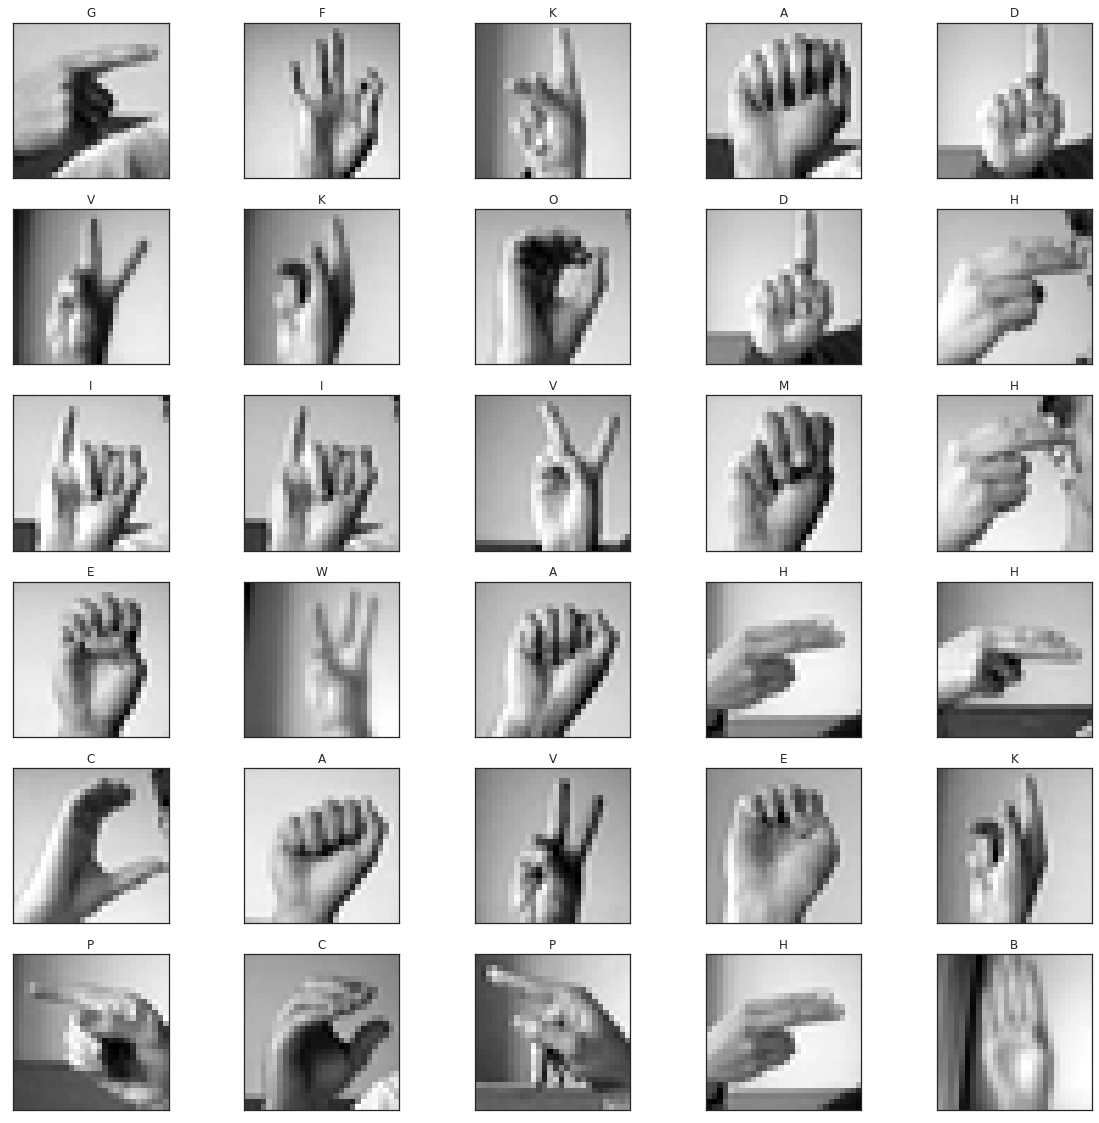

In [ ]:
def plot_test_images(test_plot, test_label):
  plt.figure(figsize=(20,20))
  for i in range(0,30):
    plt.subplot(6,5,i+1)
    plt.imshow(test_plot[i].reshape(int(math.sqrt(test.shape[1])),int(math.sqrt(test.shape[1]))),cmap='gray')
    plt.title(dictionary[test_label[i]])
    
    plt.xticks(())
    plt.yticks(())

plot_test_images(test_plot, test_label)

Predicciones

---



In [ ]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

In [ ]:
X_test = dataset_source/255.
y_test = np.array(test_label)
print(X_test)

[[0.58431375 0.58431375 0.5882353  ... 0.4392157  0.47058824 0.41960785]
 [0.49411765 0.5019608  0.5137255  ... 0.72156864 0.7137255  0.7058824 ]
 [0.33333334 0.34509805 0.36078432 ... 0.88235295 0.8784314  0.87058824]
 ...
 [0.74509805 0.7490196  0.74509805 ... 0.827451   0.81960785 0.8156863 ]
 [0.7882353  0.8039216  0.8156863  ... 0.2627451  0.27450982 0.24705882]
 [0.6784314  0.68235296 0.6784314  ... 0.7647059  0.75686276 0.7529412 ]]


In [ ]:
from sklearn.decomposition import PCA
#We enable the whitening option of PCA: Use standardScaler after the 
#transformation. Fit the PCA object and extract the first 100 principal components

X_unknown_test = pca.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



Hard Voting

---



In [ ]:
y_pred = hard_voting_clf.predict(X_unknown_test)
print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

VotingClassifier 0.7649191299498048


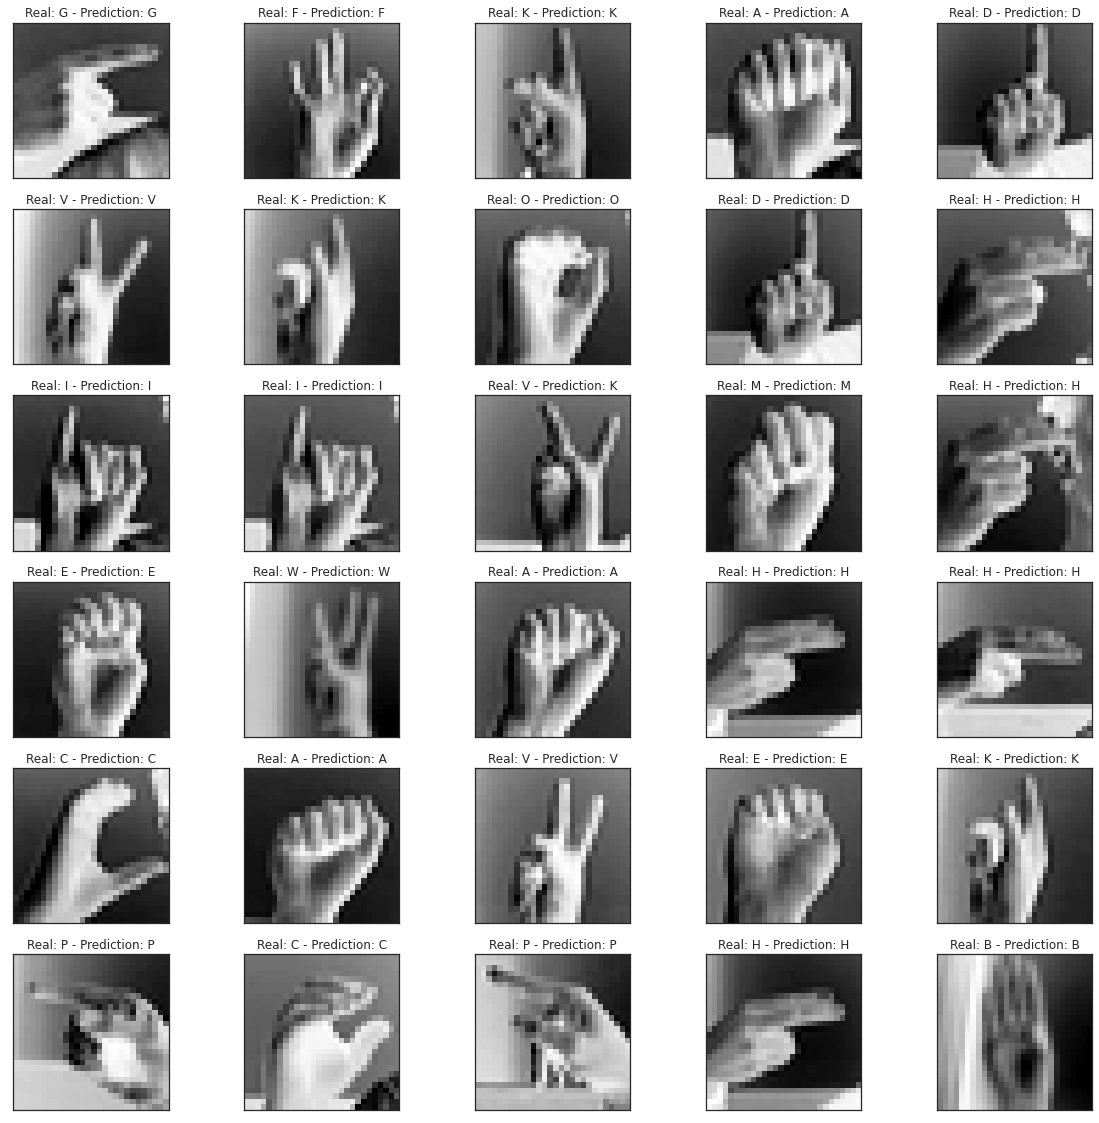

In [ ]:
plot_images_prediction(X_test, y_test,y_pred)

Soft Voting prediction

---



In [ ]:
y_pred = soft_voting_clf.predict(X_unknown_test)
print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

VotingClassifier 0.7674288901282766


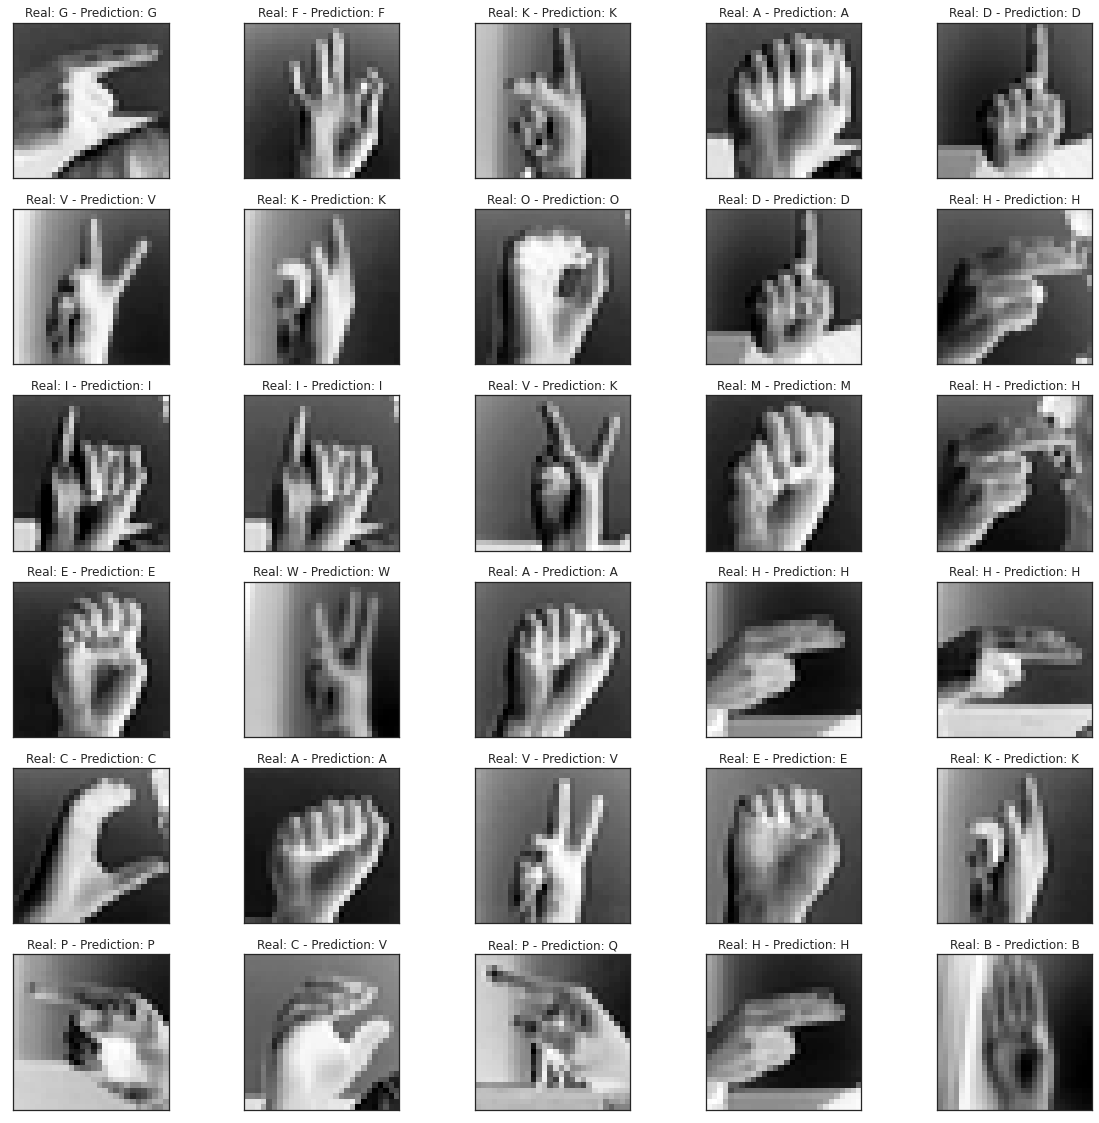

In [ ]:
plot_images_prediction(X_test, y_test,y_pred)

Bagging Prediction

---



In [ ]:
y_pred = bag_clf.predict(X_unknown_test)
print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

VotingClassifier 0.8460680423870608


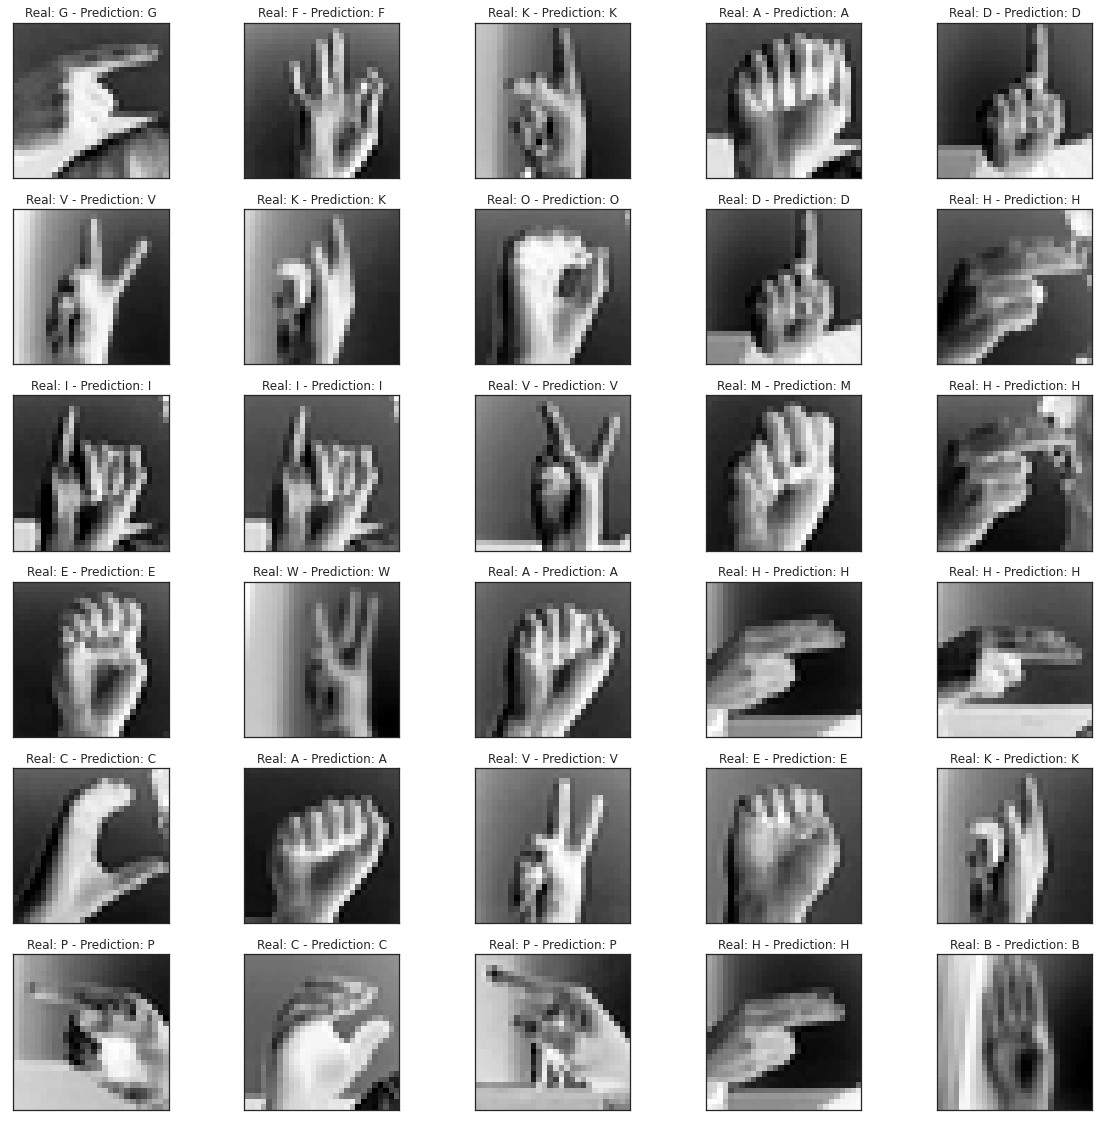

In [ ]:
plot_images_prediction(X_test, y_test,y_pred)

### RNA

In [ ]:

train_data = np.array(train_dataset, dtype = 'float32')
test_data = np.array(test_dataset, dtype='float32')

In [ ]:

class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

In [ ]:
from tensorflow.keras.utils import to_categorical
#Normalize / scale X values
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.

#Convert y to categorical  using categorical cross entropy
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

#Reshape for the neural network
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

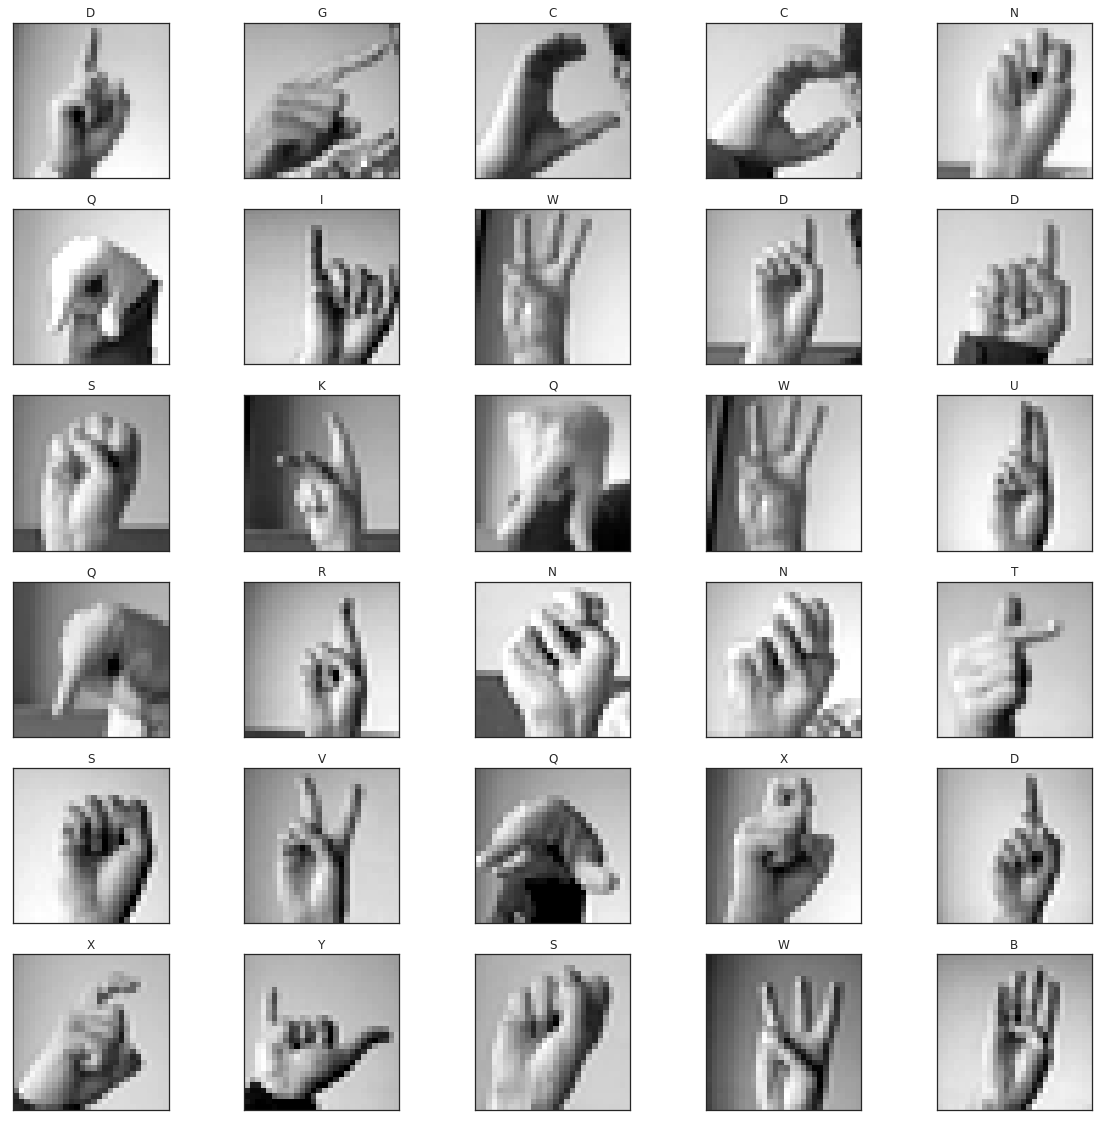

In [ ]:
plt.figure(figsize=(20,20))
for i in range(0,30):
    plt.subplot(6,5,i+1)
    plt.imshow(train_data[i,1:].reshape(28,28),cmap='gray')
    plt.title(class_names[int(train_data[i,0])])
    plt.xticks(())
    plt.yticks(())

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Con aumento de datos para evitar el sobreajuste

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,   
        samplewise_std_normalization=False,   
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1,
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip=False,  
        vertical_flip=False)  


datagen.fit(X_train)

In [ ]:
from keras.callbacks import ReduceLROnPlateau # Reduzce la tasa de aprendizaje cuando una métrica ha dejado de mejorar.
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam



model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1) ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(25, activation='softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [ ]:

batch_size=16

history = model.fit(datagen.flow(X_train,y_train_cat, batch_size = 128) ,
                    epochs = 20 , validation_data = (X_test, y_test_cat) , 
                    callbacks = [learning_rate_reduction])



Epoch 1/20
215/215 [==============================] - 49s 224ms/step - loss: 2.9938 - accuracy: 0.0936 - val_loss: 2.3320 - val_accuracy: 0.2869 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 60s 280ms/step - loss: 2.0638 - accuracy: 0.3268 - val_loss: 1.2213 - val_accuracy: 0.5930 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 51s 237ms/step - loss: 1.4415 - accuracy: 0.5158 - val_loss: 0.7884 - val_accuracy: 0.7330 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 49s 228ms/step - loss: 1.1712 - accuracy: 0.6003 - val_loss: 0.5828 - val_accuracy: 0.8056 - lr: 0.0010
Epoch 5/20
215/215 [==============================] - 49s 227ms/step - loss: 0.9961 - accuracy: 0.6604 - val_loss: 0.4616 - val_accuracy: 0.8546 - lr: 0.0010
Epoch 6/20
215/215 [==============================] - 48s 225ms/step - loss: 0.8647 - accuracy: 0.7014 - val_loss: 0.4142 - val_accuracy: 0.8567 - lr: 0.0010
Epoch 7/20
215/215 [==============================] 

In [ ]:
print("Accuracy of the model is - " , model.evaluate(X_test, y_test_cat)[1]*100,"%")

225/225 [==============================] - 3s 14ms/step - loss: 0.0701 - accuracy: 0.9826
Accuracy of the model is -  98.25711250305176 %


Text(0.5, 1.0, 'Accuracy evolution')

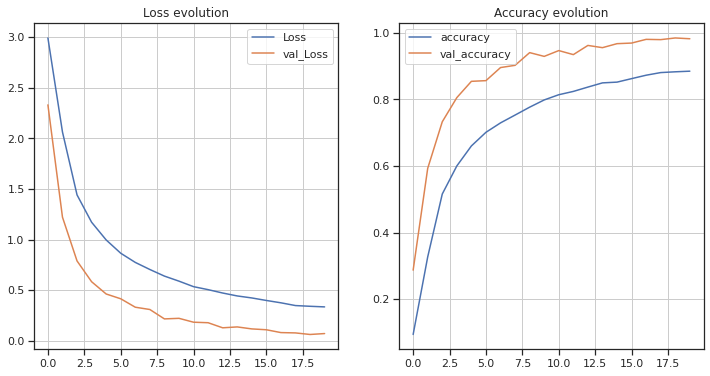

In [ ]:
#Visualización del rendimiento del entrenamiento
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

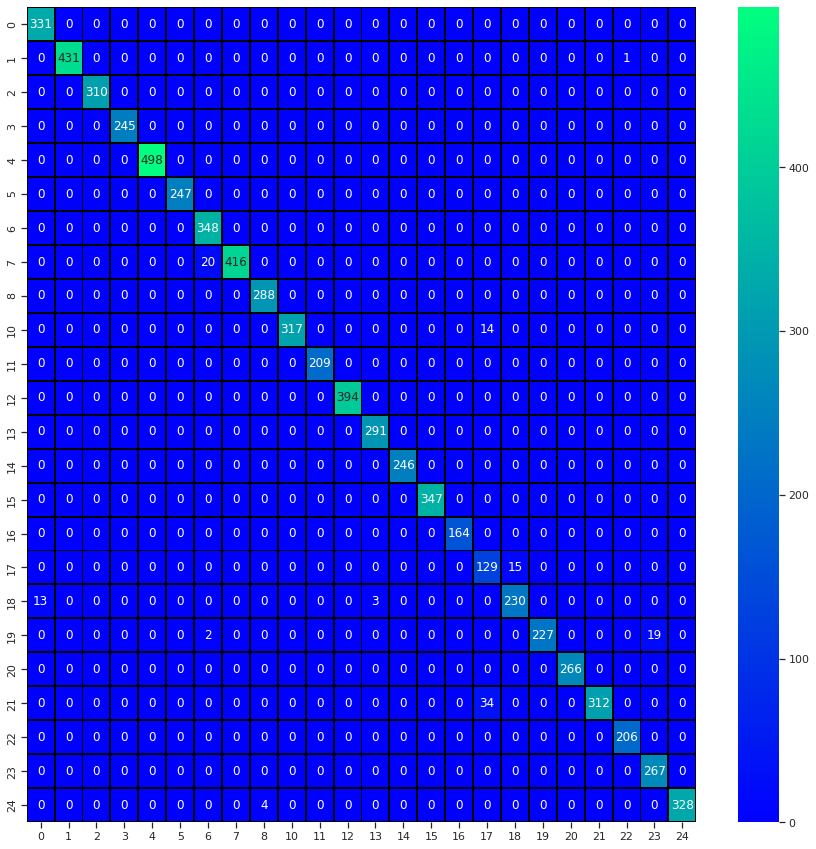

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

prediction=model.predict(X_test) 
y = test_dataset['label']
predictions=np.argmax(prediction,axis=1)
cm = confusion_matrix( y,predictions)
cm = pd.DataFrame(cm , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "winter", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

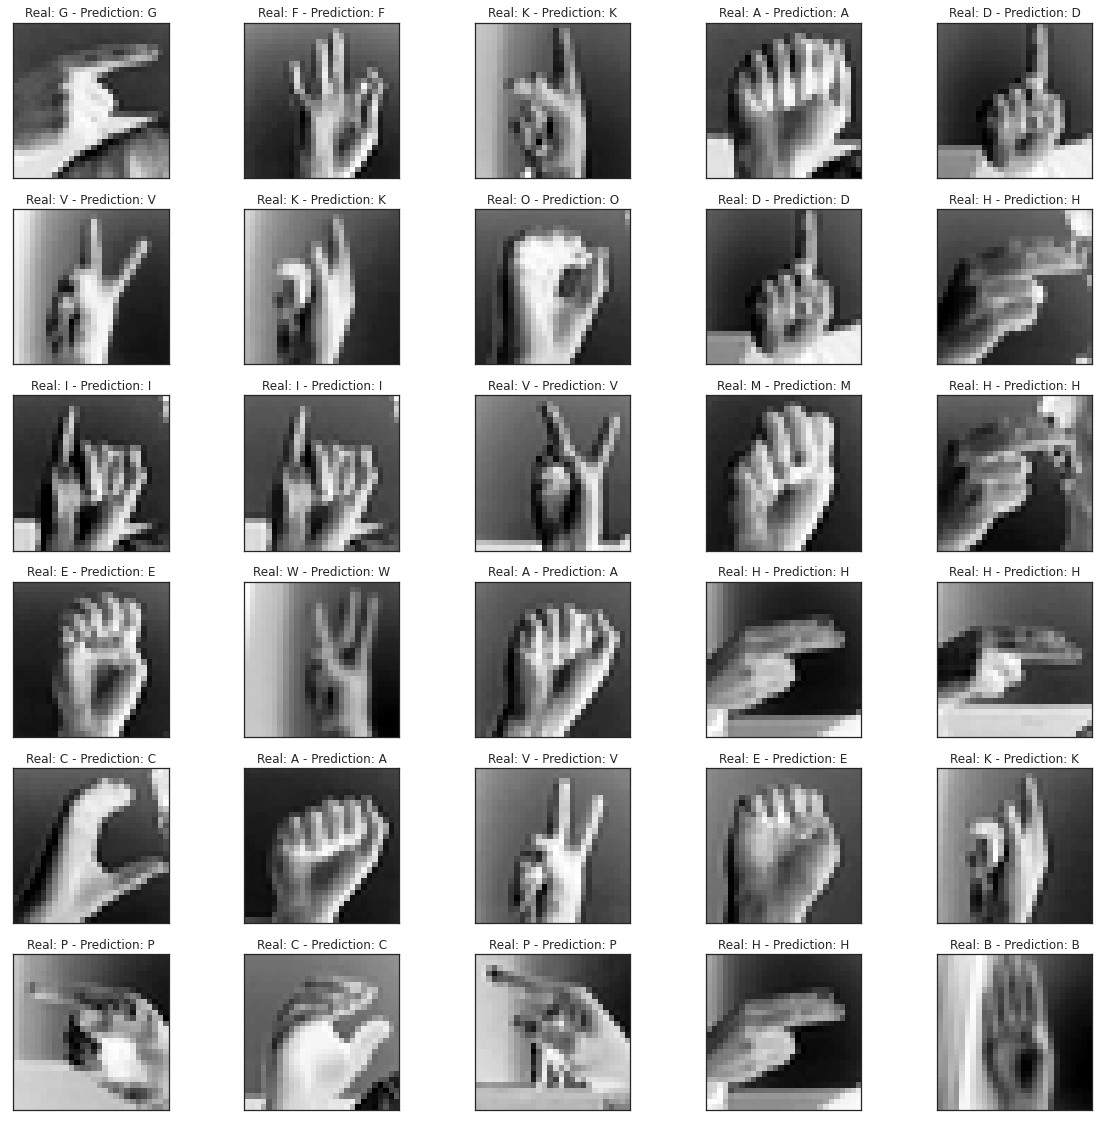

In [ ]:
plt.figure(figsize=(20,20))
for i in range(0,30):
    plt.subplot(6,5,i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='Greys')
    plt.title("Real: {} - Prediction: {}".format(class_names[int(y_test[i])],class_names[int(predictions[i])]))
    plt.xticks(())
    plt.yticks(())